In [1]:
import sys
import logging


base_path = '/notebooks/eipi10/python-book/arsenal'
sys.path.append(base_path)
current_path = '.'
current_data_path = current_path + "/data"


logging.basicConfig(format='%(asctime)s: %(levelname)s: %(message)s')
logging.root.setLevel(level=logging.INFO)

import collections
import math
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import re
import time


from pprint import pprint
from eipi10.ml2.utils import *

pd.set_option('display.width', 1000)
os.environ["https_proxy"] = "http://web-proxy.rose.hp.com:8080"
os.environ["http_proxy"] = "http://web-proxy.rose.hp.com:8080"

%matplotlib inline

# 代码自动重新加载
%load_ext autoreload
%autoreload 2

# #当module有新的方法的时候，需要运行下面方法。
# %reload_ext autoreload 



### 1.40  词云Word Cloud 【2018-11-01】

https://amueller.github.io/word_cloud/auto_examples/masked.html 详细的介绍，各种例子。有意思的各种mask，可以做出任意的图形


我 来到 北京 清华大学 他 来到 了 网易 杭研 大厦 小明 硕士 毕业 于 中国科学院 我 爱 北京 天安门 中国 已经 崛起 每 一个 中国 人 都 爱 中国


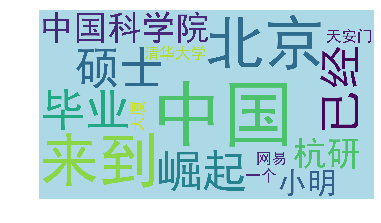

笔记本 电源 坏 充 电 好的 机器 购买 多久 保修期 这样的话 需要 辛苦 机器 拿到 维修站 帮 检测 更换 一个 电源 重庆 荣昌 查下 维修站 地点 惠普 接机 点 地址 荣昌县 昌州 街道 荣城 御景 一家 接机 点 机器 送 过去 后 帮 机器 拿到 维修站 维修 送到 重庆 维修 恩恩是 发票 保修卡 丢 影响 机器 序列号 序列号 查询 一年 保修期 一下 之前 登记 机器 序列号 问题 机器 保修 年 月 日 只用 电脑 过去 就行 恩 只 机器 就行 最近 惠普 推出 新 延保 服务 购买 优惠活动 笔记本 自带 硬件 送修 升级 三年 硬件 上门服务 升级 完成 后 遇到 硬件 故障 小惠 直接 报修 申请 上门 维护 更换 方便 一些 送 售后 解决问题 感兴趣 邮箱 里 发送 相关 介绍 时间 了解 一下 好的 先发 微信 链接 看看 反馈 之后 销售 相关 信息 发到 邮箱 里 方便 回电 好的 麻烦 保持 电话 畅通 接机 站 电话 还要 收 送货 费 保修期 免费 是不是 以为 机器 已经 过保 说 接机 站 收取 惠普 费用 送货 给钱 麻烦 稍 核实 一下 已经 问题 升级 反馈 后续 工程师 联系 进一步 帮 处理 问题 微信 电话 联系


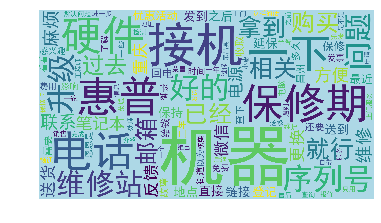

In [3]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import jieba
# import matplotlib as mpl
import matplotlib.font_manager as mfm 

# cp eipi10/simhei.ttf /usr/local/lib/python3.5/dist-packages/matplotlib/mpl-data/fonts/ttf

def show_img(wc):
#     plt.figure()
    plt.imshow(wc)
    plt.axis("off")
    plt.savefig("wordcloud.png")
    plt.show()

    
raw_corpus = ["我来到北京清华大学",
          "他来到了网易杭研大厦",
          "小明硕士毕业于中国科学院",
          "我爱北京天安门",
          "中国已经崛起",
          "每一个中国人都爱中国"
         ]


corpus = " ".join([word for line in raw_corpus for word in jieba.cut(line, cut_all=False)])
print(corpus)

# ch_font = mfm.FontProperties(fname='/usr/local/lib/python3.5/dist-packages/matplotlib/mpl-data/fonts/ttf/simhei.ttf')
wc = WordCloud(font_path='/usr/local/lib/python3.5/dist-packages/matplotlib/mpl-data/fonts/ttf/simhei.ttf',
               max_words=2000,
               width=1920,
               height=1080,
               background_color="lightblue",
               margin=5)
my_wordcloud = wc.generate(corpus)
show_img(wc)


words = ['笔记本', '电源', '坏', '充', '电', '好的', '机器', '购买', '多久', '保修期', '这样的话', '需要', '辛苦', '机器', '拿到', '维修站', '帮', '检测', '更换', '一个', '电源', '重庆', '荣昌', '查下', '维修站', '地点', '惠普', '接机', '点', '地址', '荣昌县', '昌州', '街道', '荣城', '御景', '一家', '接机', '点', '机器', '送', '过去', '后', '帮', '机器', '拿到', '维修站', '维修', '送到', '重庆', '维修', '恩恩是', '发票', '保修卡', '丢', '影响', '机器', '序列号', '序列号', '查询', '一年', '保修期', '一下', '之前', '登记', '机器', '序列号', '问题', '机器', '保修', '年', '月', '日', '只用', '电脑', '过去', '就行', '恩', '只', '机器', '就行', '最近', '惠普', '推出', '新', '延保', '服务', '购买', '优惠活动', '笔记本', '自带', '硬件', '送修', '升级', '三年', '硬件', '上门服务', '升级', '完成', '后', '遇到', '硬件', '故障', '小惠', '直接', '报修', '申请', '上门', '维护', '更换', '方便', '一些', '送', '售后', '解决问题', '感兴趣', '邮箱', '里', '发送', '相关', '介绍', '时间', '了解', '一下', '好的', '先发', '微信', '链接', '看看', '反馈', '之后', '销售', '相关', '信息', '发到', '邮箱', '里', '方便', '回电', '好的', '麻烦', '保持', '电话', '畅通', '接机', '站', '电话', '还要', '收', '送货', '费', '保修期', '免费', '是不是', '以为', '机器', '已经', '过保', '说', '接机', '站', '收取', '惠普', '费用', '送货', '给钱', '麻烦', '稍', '核实', '一下', '已经', '问题', '升级', '反馈', '后续', '工程师', '联系', '进一步', '帮', '处理', '问题', '微信', '电话', '联系']
corpus = " ".join(words)
print(corpus)

# ch_font = mfm.FontProperties(fname='/usr/local/lib/python3.5/dist-packages/matplotlib/mpl-data/fonts/ttf/simhei.ttf')
# wc = WordCloud(font_path='/usr/local/lib/python3.5/dist-packages/matplotlib/mpl-data/fonts/ttf/simhei.ttf',
#                max_words=2000,
#                width=1920,
#                height=1080,
#                background_color="white",
#                margin=5)
my_wordcloud = wc.generate(corpus)
show_img(wc)



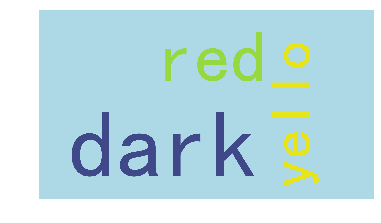

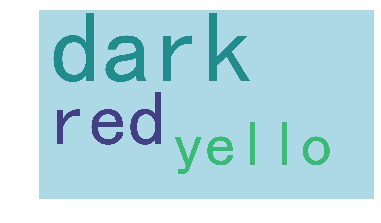

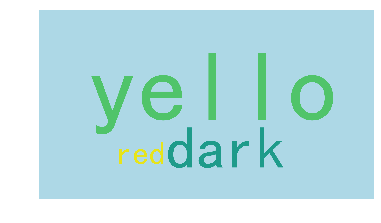

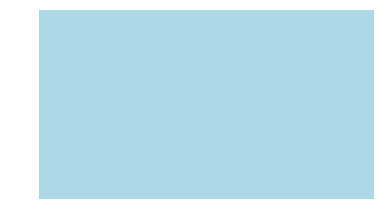

In [5]:

frequencies = {'red': 3.2/4, 'yello': 2/4, 'dark':6/4}
wc.generate_from_frequencies(frequencies=frequencies)
show_img(wc)

frequencies = {'red': 3.2, 'yello': 2, 'dark':6}
wc.generate_from_frequencies(frequencies=frequencies)
show_img(wc)

frequencies = {'red': 0.02, 'yello': 1, 'dark':0.2}
wc.generate_from_frequencies(frequencies=frequencies)
show_img(wc)

frequencies = {' ': 0.02}
wc.generate_from_frequencies(frequencies=frequencies)
show_img(wc)



### 1.39 特征抽取【Feature extraction】 【2018-10-19】

http://scikit-learn.org/stable/modules/feature_extraction.html


**one-hot coding for categorical features**

DictVectorizer implements what is called one-of-K or “one-hot” coding for categorical (aka nominal, discrete) features. 主要介绍了sklearn中的特征抽取，转换和表示技术。  
DictVectorizer class uses a scipy.sparse matrix by default instead of a numpy.ndarray. 对于稀疏数据，是一个非常好的选择

In [23]:
from sklearn.feature_extraction import DictVectorizer

measurements = [
    {'city': 'Dubai', 'temperature': 33.},
    {'city': 'London', 'temperature': 12.},
    {'city': 'San Francisco', 'temperature': 18.},
]

vec = DictVectorizer()
print(vec.fit_transform(measurements).toarray())
print(vec.get_feature_names())
print(vec.inverse_transform([[1, 0, 0, 21]]))

[[ 1.  0.  0. 33.]
 [ 0.  1.  0. 12.]
 [ 0.  0.  1. 18.]]
['city=Dubai', 'city=London', 'city=San Francisco', 'temperature']
[{'city=Dubai': 1, 'temperature': 21}]


In [20]:
pos_window = [
    {
        'word-2': 'the',
        'pos-2': 'DT',
        'word-1': 'cat',
        'pos-1': 'NN',
        'word+1': 'on',
        'pos+1': 'PP',
    },
    {
        'word-2': 'a',
        'pos-2': 'ART ',
        'word-1': 'big',
        'pos-1': 'Aa',
        'word+1': 'dog',
        'pos+1': 'NN',
    }    
    # in a real application one would extract many such dictionaries
]

vec = DictVectorizer()
pos_vectorized = vec.fit_transform(pos_window)
print(pos_vectorized)
print(pos_vectorized.toarray())
print(vec.get_feature_names())

  (0, 1)	1.0
  (0, 3)	1.0
  (0, 5)	1.0
  (0, 7)	1.0
  (0, 9)	1.0
  (0, 11)	1.0
  (1, 0)	1.0
  (1, 2)	1.0
  (1, 4)	1.0
  (1, 6)	1.0
  (1, 8)	1.0
  (1, 10)	1.0
[[0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1.]
 [1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0.]]
<class 'numpy.ndarray'>
['pos+1=NN', 'pos+1=PP', 'pos-1=Aa', 'pos-1=NN', 'pos-2=ART ', 'pos-2=DT', 'word+1=dog', 'word+1=on', 'word-1=big', 'word-1=cat', 'word-2=a', 'word-2=the']


**Feature hashing**

 FeatureHasher is a high-speed, low-memory vectorizer that uses a technique known as feature hashing, or the “hashing trick”. 
 
Hashing trick，有时候也叫做feature hashing，在自然语音中已经用作降维的手段。在一般的机器学习任务中，它也可以对categorical feature进行降维。

举个例子，比如你是淘宝的算法工程师，你要做一个退货的预测模型，假设有一个feature是location_id，表示商品的产地。这个是categorical feature，所以你通常需要做one-hot encoding，把这一列转化为dummy variable。商品来自全国各市、全球各国，可能这个location_id就有成千上万个数值。转码之后，模型就会增加这一万个dummy变量。这对数据的读取、操作，模型的训练都是极大的挑战。

Hashing trick就是用hashing function这个小技巧来降维。若location_id都是整数，我们可以对所有的location_id取余，location_id (mod p)，这个取余函数就是我们使用的hashing function。很显然进行取余操作之后，我们最多只有p个不同的数值了。在此之上再用one-hot encoding，我们只增加了p列。

参考：   
- [什么是feature hashing?](https://www.zhihu.com/question/34689675)
- [hashing trick或者feature hashing是什么](http://sofasofa.io/forum_main_post.php?postid=1000433)
- [Vectorizing a large text corpus with the hashing trick](http://scikit-learn.org/stable/modules/feature_extraction.html#vectorizing-a-large-text-corpus-with-the-hashing-trick)

In [56]:
from sklearn.feature_extraction.text import HashingVectorizer
corpus = [
    'This is the first document.',
    'This is the second second document.',
    'And the third one.',
    'Is this the first document?',
]
hv = HashingVectorizer(n_features=10)
print(hv)
X = hv.transform(corpus)
X



HashingVectorizer(alternate_sign=True, analyzer='word', binary=False,
         decode_error='strict', dtype=<class 'numpy.float64'>,
         encoding='utf-8', input='content', lowercase=True, n_features=10,
         ngram_range=(1, 1), non_negative=False, norm='l2',
         preprocessor=None, stop_words=None, strip_accents=None,
         token_pattern='(?u)\\b\\w\\w+\\b', tokenizer=None)


<4x10 sparse matrix of type '<class 'numpy.float64'>'
	with 16 stored elements in Compressed Sparse Row format>

In [57]:
print(X.shape)
print(X.toarray()==hv.fit_transform(corpus).toarray()) # 对于HashingVectorizer，并不需要训练过程，所以结果相同


(4, 10)
[[ True  True  True  True  True  True  True  True  True  True]
 [ True  True  True  True  True  True  True  True  True  True]
 [ True  True  True  True  True  True  True  True  True  True]
 [ True  True  True  True  True  True  True  True  True  True]]


默认情况下， n_features的缺省值是2 ** 20

In [58]:
hv = HashingVectorizer()
print(hv)
X = hv.transform(corpus)
X


HashingVectorizer(alternate_sign=True, analyzer='word', binary=False,
         decode_error='strict', dtype=<class 'numpy.float64'>,
         encoding='utf-8', input='content', lowercase=True,
         n_features=1048576, ngram_range=(1, 1), non_negative=False,
         norm='l2', preprocessor=None, stop_words=None, strip_accents=None,
         token_pattern='(?u)\\b\\w\\w+\\b', tokenizer=None)


<4x1048576 sparse matrix of type '<class 'numpy.float64'>'
	with 19 stored elements in Compressed Sparse Row format>

**BOW(Bag of Words)**

In [46]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
vectorizer                        

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [47]:
corpus = [
    'This is the first document.',
    'This is the second second document.',
    'And the third one.',
    'Is this the first document?',
]
X = vectorizer.fit_transform(corpus)
X

<4x9 sparse matrix of type '<class 'numpy.int64'>'
	with 19 stored elements in Compressed Sparse Row format>

注意：token_pattern默认是r"(?u)\b\w\w+\b"，它只会匹配长度两个以上的字符。下面的例子可以说明。

In [48]:
analyze = vectorizer.build_analyzer()
print(analyze("This is a text document to analyze.") == (['this', 'is', 'text', 'document', 'to', 'analyze']))
print(vectorizer.get_feature_names() == (['and', 'document', 'first', 'is', 'one',
                                    'second', 'the', 'third', 'this']))
print(X.shape)
print(X.toarray())
print(vectorizer.vocabulary_.get('third'))
print(vectorizer.transform(['Something completely new first .']).toarray()) #不在training语料中的词汇都会被忽略

True
True
(4, 9)
[[0 1 1 1 0 0 1 0 1]
 [0 1 0 1 0 2 1 0 1]
 [1 0 0 0 1 0 1 1 0]
 [0 1 1 1 0 0 1 0 1]]
7
[[0 0 1 0 0 0 0 0 0]]


**BOW: 2-grams**



In [38]:
bigram_vectorizer = CountVectorizer(ngram_range=(1, 2),
                                    token_pattern=r'\b\w+\b', min_df=1)
X = bigram_vectorizer.fit_transform(corpus)

analyze = bigram_vectorizer.build_analyzer()
print(analyze('Bi-grams are cool!') == (
    ['bi', 'grams', 'are', 'cool', 'bi grams', 'grams are', 'are cool']))
print(bigram_vectorizer.get_feature_names())
print(X.shape)
print(X.toarray())
print(vectorizer.vocabulary_.get('third'))
feature_index = bigram_vectorizer.vocabulary_.get('is this')
print(X.toarray()[:, feature_index])

True
['and', 'and the', 'document', 'first', 'first document', 'is', 'is the', 'is this', 'one', 'second', 'second document', 'second second', 'the', 'the first', 'the second', 'the third', 'third', 'third one', 'this', 'this is', 'this the']
(4, 21)
[[0 0 1 1 1 1 1 0 0 0 0 0 1 1 0 0 0 0 1 1 0]
 [0 0 1 0 0 1 1 0 0 2 1 1 1 0 1 0 0 0 1 1 0]
 [1 1 0 0 0 0 0 0 1 0 0 0 1 0 0 1 1 1 0 0 0]
 [0 0 1 1 1 1 0 1 0 0 0 0 1 1 0 0 0 0 1 0 1]]
7
[0 0 0 1]


**BOW: character 2-gram**

'words', 'wprds'： 第二个单词是拼写错误，如果用从单词角度上，差别特别大，但如果到character ，发现他们还是很相似的。

In [41]:
ngram_vectorizer = CountVectorizer(analyzer='char_wb', ngram_range=(2, 2))
counts = ngram_vectorizer.fit_transform(['words', 'wprds'])
print(ngram_vectorizer.get_feature_names() == (
    [' w', 'ds', 'or', 'pr', 'rd', 's ', 'wo', 'wp']))
counts.toarray().astype(int)

True


array([[1, 1, 1, 0, 1, 1, 1, 0],
       [1, 1, 0, 1, 1, 1, 0, 1]])

char_wb和char的区别：前者只考虑单词内部的n gram

In [42]:
ngram_vectorizer = CountVectorizer(analyzer='char_wb', ngram_range=(5, 5))
ngram_vectorizer.fit_transform(['jumpy fox'])
print(ngram_vectorizer.get_feature_names() == ([' fox ', ' jump', 'jumpy', 'umpy ']))

ngram_vectorizer = CountVectorizer(analyzer='char', ngram_range=(5, 5))
ngram_vectorizer.fit_transform(['jumpy fox'])
print(ngram_vectorizer.get_feature_names() == (['jumpy', 'mpy f', 'py fo', 'umpy ', 'y fox']))

True
True


### 1.38 不同算法的 decision surface 【2018-10-19】

http://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html

Example from sklearn with different decision surfaces

Automatically created module for IPython interactive environment


/usr/local/lib/python3.5/dist-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d
/usr/local/lib/python3.5/dist-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.5/dist-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.5/dist-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, Conv

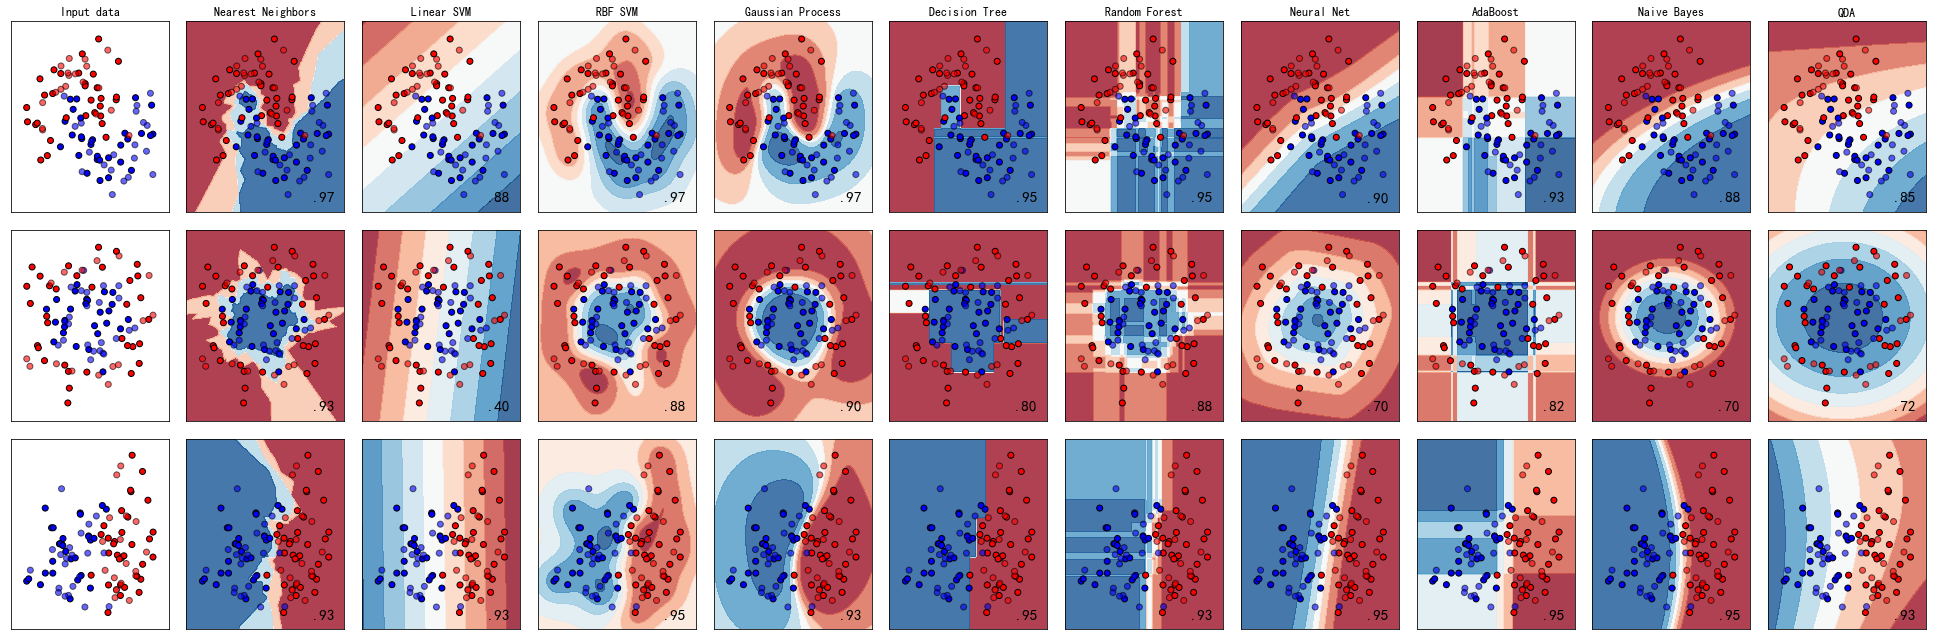

In [12]:
print(__doc__)


# Code source: Gaël Varoquaux
#              Andreas Müller
# Modified for documentation by Jaques Grobler
# License: BSD 3 clause

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

h = .02  # step size in the mesh

names = ["Nearest Neighbors", "Linear SVM", "RBF SVM", "Gaussian Process",
         "Decision Tree", "Random Forest", "Neural Net", "AdaBoost",
         "Naive Bayes", "QDA"]

classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1),
    GaussianProcessClassifier(1.0 * RBF(1.0)),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    MLPClassifier(alpha=1),
    AdaBoostClassifier(),
    GaussianNB(),
    QuadraticDiscriminantAnalysis()]

X, y = make_classification(n_features=2, n_redundant=0, n_informative=2,
                           random_state=1, n_clusters_per_class=1)
rng = np.random.RandomState(2)
X += 2 * rng.uniform(size=X.shape)
linearly_separable = (X, y)

datasets = [make_moons(noise=0.3, random_state=0),
            make_circles(noise=0.2, factor=0.5, random_state=1),
            linearly_separable
            ]

figure = plt.figure(figsize=(27, 9))
i = 1
# iterate over datasets
for ds_cnt, ds in enumerate(datasets):
    # preprocess dataset, split into training and test part
    X, y = ds
    X = StandardScaler().fit_transform(X)
    X_train, X_test, y_train, y_test = \
        train_test_split(X, y, test_size=.4, random_state=42)

    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    # just plot the dataset first
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(['#FF0000', '#0000FF'])
    ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
    if ds_cnt == 0:
        ax.set_title("Input data")
    # Plot the training points
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
               edgecolors='k')
    # Plot the testing points
    ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6,
               edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    i += 1

    # iterate over classifiers
    for name, clf in zip(names, classifiers):
        ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
        clf.fit(X_train, y_train)
        score = clf.score(X_test, y_test)

        # Plot the decision boundary. For that, we will assign a color to each
        # point in the mesh [x_min, x_max]x[y_min, y_max].
        if hasattr(clf, "decision_function"):
            Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
        else:
            Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

        # Put the result into a color plot
        Z = Z.reshape(xx.shape)
        ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)

        # Plot the training points
        ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
                   edgecolors='k')
        # Plot the testing points
        ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright,
                   edgecolors='k', alpha=0.6)

        ax.set_xlim(xx.min(), xx.max())
        ax.set_ylim(yy.min(), yy.max())
        ax.set_xticks(())
        ax.set_yticks(())
        if ds_cnt == 0:
            ax.set_title(name)
        ax.text(xx.max() - .3, yy.min() + .3, ('%.2f' % score).lstrip('0'),
                size=15, horizontalalignment='right')
        i += 1

plt.tight_layout()
plt.show()

### 1.37 著名的AI比赛平台 【2018-10-17】

国外： 

- Kaggle: https://www.kaggle.com/ , 毫无疑问，最大的平台。
- DrivenData: https://www.drivendata.org/
- CrowdAnalityx: 网站找不到， 只找到一个类似的 https://www.crowdanalytix.com/
- CodaLab: http://codalab.org/  里面有AutoML的比赛
- DataScienceChallenge: https://www.datasciencechallenge.org/  好像已经没有人气了
- Datascience.net: https://www.datascience.net/fr/home/   看上去好像法国人搞的。
- Single-competition sites (like KDD, VizDoom)
    - ViZdoom http://vizdoom.cs.put.edu.pl/  ViZDoom is a Doom-based AI research platform for reinforcement learning from raw visual information. 游戏相关

国内：

- DataFountain https://www.datafountain.cn/
- 阿里云 天池 https://tianchi.aliyun.com/
- 蚂蚁金服 ATEC开发者大赛： https://dc.cloud.alipay.com/index#/compet/topics

### 1.36 ubuntu安装中文字体 【2018-10-16】

**安装fontconfig**

在ubuntu上安装fontconfig 

```shell
http_proxy='http://web-proxy.rose.hp.com:8080 ' apt-get install -y fontconfig

```
**中文字体安装**
https://gist.github.com/allex/11203573

Debian 和 Ubuntu 下对中文支持比较好的字体有： fonts-droid、ttf-wqy-zenhei 和 ttf-wqy-microhei 等，除了文泉驿系列字体外，比较流行的免费中文字体还有文鼎提供的楷体和上海宋，包名分别是： fonts-arphic-ukai 和 fonts-arphic-uming。

```shell
fc-list :lang=zh
http_proxy='http://web-proxy.rose.hp.com:8080 ' apt-get install  ttf-wqy-zenhei ttf-wqy-microhei fonts-arphic-ukai fonts-arphic-uming
fc-list :lang=zh
fc-cache -f /usr/share/fonts/truetype/   #设置字体的cache
```

### 1.35 matplotlib 显示中文（解决乱码）【2018-10-16】

https://jdhao.github.io/2017/05/13/guide-on-how-to-use-chinese-with-matplotlib/

- 下载中文字体SimHei到主机的~/eipi10/software/目录  
   下载地址： https://www.fontpalace.com/font-details/SimHei/ 

- 安装字体到matplotlib   

```shell
cd /usr/local/lib/python3.5/dist-packages/matplotlib/mpl-data/fonts/ttf
mv /notebooks/eipi10/software/simhei.ttf ./
#清除缓存
rm -rf  /root/.cache/matplotlib/fontlist-v300.json  
```

**显示matplotlib中支持的字体**

In [66]:
import matplotlib
print('配置文件位置', matplotlib.matplotlib_fname())
print('当前字体', matplotlib.font_manager.FontProperties().get_family())
sorted([f.name for f in matplotlib.font_manager.fontManager.ttflist])

配置文件位置 /usr/local/lib/python3.5/dist-packages/matplotlib/mpl-data/matplotlibrc
当前字体 ['SimHei']


['DejaVu Sans',
 'DejaVu Sans',
 'DejaVu Sans',
 'DejaVu Sans',
 'DejaVu Sans Display',
 'DejaVu Sans Mono',
 'DejaVu Sans Mono',
 'DejaVu Sans Mono',
 'DejaVu Sans Mono',
 'DejaVu Serif',
 'DejaVu Serif',
 'DejaVu Serif',
 'DejaVu Serif',
 'DejaVu Serif Display',
 'STIXGeneral',
 'STIXGeneral',
 'STIXGeneral',
 'STIXGeneral',
 'STIXNonUnicode',
 'STIXNonUnicode',
 'STIXNonUnicode',
 'STIXNonUnicode',
 'STIXSizeFiveSym',
 'STIXSizeFourSym',
 'STIXSizeFourSym',
 'STIXSizeOneSym',
 'STIXSizeOneSym',
 'STIXSizeThreeSym',
 'STIXSizeThreeSym',
 'STIXSizeTwoSym',
 'STIXSizeTwoSym',
 'SimHei',
 'cmb10',
 'cmex10',
 'cmmi10',
 'cmr10',
 'cmss10',
 'cmsy10',
 'cmtt10']

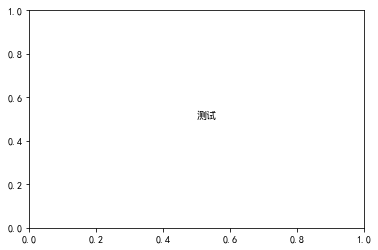

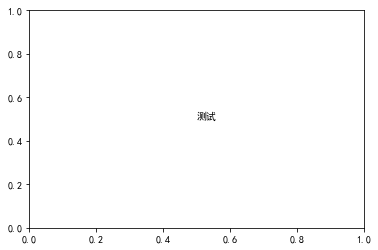

In [67]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as mfm

ch_font = mfm.FontProperties(fname="/usr/share/fonts/truetype/wqy/wqy-microhei.ttc")
plt.text(0.5, 0.5, s=u'测试', fontproperties=ch_font)
plt.show()

ch_font = mfm.FontProperties(fname='/usr/local/lib/python3.5/dist-packages/matplotlib/mpl-data/fonts/ttf/simhei.ttf')
plt.text(0.5, 0.5, s=u'测试', fontproperties=ch_font)
plt.show()



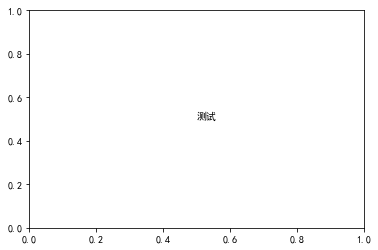

In [70]:
import matplotlib as mpl
mpl.rcParams['font.family']="SimHei"
mpl.rcParams['axes.unicode_minus']=False # in case minus sign is shown as box
plt.text(0.5, 0.5, s=u'测试')
plt.show()

### 1.34 使用t-SNE可视化词向量 

**history**
- 【2018-10-14】初始版本，主要参考https://www.kaggle.com/jeffd23/visualizing-word-vectors-with-t-sne/notebook
- 【2018-10-19】接下来要研究一下 https://github.com/danielfrg/tsne 这里面更加的专业


**下载数据**

```shell
mkdir -p ./data/t-SNE
cd ./data/t-SNE
wget https://www.kaggle.com/c/quora-question-pairs/download/train.csv 
```

In [3]:
import pandas as pd
pd.options.mode.chained_assignment = None 
import numpy as np
import re
import nltk

from gensim.models import word2vec

from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
%matplotlib inline



**Data**

In [9]:
data = pd.read_csv('./data/t-SNE/train.csv').sample(50000, random_state=23)
print(len(data))
data[15:20]

50000


,id,qid1,qid2,question1,question2,is_duplicate
336248,336248,14999,11797,When a question on Quora is marked as 'needing...,Can Quora quote the improvements needed in the...,1
148538,148538,185594,82455,What is the expected cut off for SSC CGL Tier ...,What is the expected cut off for SSC CGL 2016 ...,1
200886,200886,202942,302772,Why is Mrs. Clinton denying she lied to Congre...,Why do Democrats not care that Hillary Clinton...,0
308318,308318,432130,432131,Why does UK never apologize to China for their...,Have the British ever apologized officially to...,0
363462,363462,227283,39720,Why is the Quora page so slow to load?,Why is Quora so slow to refresh?,1


In [12]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [13]:
STOP_WORDS = nltk.corpus.stopwords.words()

def clean_sentence(val):
    "remove chars that are not letters or numbers, downcase, then remove stop words"
    regex = re.compile('([^\s\w]|_)+')
    sentence = regex.sub('', val).lower()
    sentence = sentence.split(" ")
    
    for word in list(sentence):
        if word in STOP_WORDS:
            sentence.remove(word)  
            
    sentence = " ".join(sentence)
    return sentence

def clean_dataframe(data):
    "drop nans, then apply 'clean_sentence' function to question1 and 2"
    data = data.dropna(how="any")
    
    for col in ['question1', 'question2']:
        data[col] = data[col].apply(clean_sentence)
    
    return data

data = clean_dataframe(data)
print(len(data))
data.head(5)

49999


,id,qid1,qid2,question1,question2,is_duplicate
237921,237921,9732,79801,sex necessary relationship,sex important good relationship,1
181001,181001,277377,277378,inspiring start stories,inspirational stories ever,0
294691,294691,150129,93109,best way digital marketing,best unique ways digital marketing,1
104145,104145,171986,171987,best way grow facebook fan page,get followers facebook page,1
357893,357893,487310,487311,suppose host sends two tcp segments back back ...,suppose host sends two tcp segments back back ...,1


In [15]:
def build_corpus(data):
    "Creates a list of lists containing words from each sentence"
    corpus = []
    for col in ['question1', 'question2']:
        for _, sentence in data[col].iteritems():
            word_list = sentence.split(" ")
            corpus.append(word_list)
            
    return corpus

corpus = build_corpus(data)        
corpus[0:2]

[['sex', 'necessary', 'relationship'], ['inspiring', 'start', 'stories']]

**Word2Vec**

In [16]:
model = word2vec.Word2Vec(corpus, size=100, window=20, min_count=200, workers=4)

2018-10-15 02:30:28,216: INFO: collecting all words and their counts
2018-10-15 02:30:28,218: INFO: PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2018-10-15 02:30:28,243: INFO: PROGRESS: at sentence #10000, processed 54852 words, keeping 12150 word types
2018-10-15 02:30:28,263: INFO: PROGRESS: at sentence #20000, processed 109242 words, keeping 17750 word types
2018-10-15 02:30:28,283: INFO: PROGRESS: at sentence #30000, processed 163278 words, keeping 22001 word types
2018-10-15 02:30:28,302: INFO: PROGRESS: at sentence #40000, processed 218244 words, keeping 25617 word types
2018-10-15 02:30:28,320: INFO: PROGRESS: at sentence #50000, processed 272507 words, keeping 28581 word types
2018-10-15 02:30:28,339: INFO: PROGRESS: at sentence #60000, processed 328266 words, keeping 30608 word types
2018-10-15 02:30:28,358: INFO: PROGRESS: at sentence #70000, processed 383144 words, keeping 32457 word types
2018-10-15 02:30:28,377: INFO: PROGRESS: at sentence #80000, proc

In [17]:
model.wv['trump']

array([-1.0250084 , -1.005773  , -0.5983544 , -0.27181014,  0.58083075,
       -0.65362006, -1.438374  ,  0.12597299, -0.30431524,  0.35625094,
       -0.06705806, -0.4494059 , -0.11003726, -0.09328353, -0.90891546,
       -0.5667263 , -0.34562373,  1.1956242 , -0.07586046, -0.67028725,
       -0.22540183,  0.04601704, -0.7620032 , -0.9608671 , -0.76105005,
       -0.12457526,  1.2134811 ,  0.66098756,  0.55048853,  0.9179969 ,
        0.40315536, -0.91175896, -0.31280512, -0.02242634,  0.41752863,
        0.9471436 , -0.1741714 ,  0.30671698,  1.0469205 , -0.02965609,
        0.48517567, -1.369678  ,  0.70984495,  0.9184748 , -0.10259242,
       -0.3191535 , -0.6500434 ,  0.07009242, -0.02416256, -0.59591705,
        0.5458196 ,  1.1218172 ,  0.45302942,  0.31984398, -0.45284992,
        0.24437852, -1.027797  ,  0.22752468,  0.11522563, -0.32396045,
        0.15878172, -0.3722038 ,  0.8161    , -1.0124601 ,  0.33187607,
       -1.0798731 ,  1.0386764 ,  0.2213119 , -1.2685148 , -0.26

In [18]:
def tsne_plot(model, perplexity=40, init='pca', n_iter=2500, random_state=23):
    "Creates and TSNE model and plots it"
    labels = []
    tokens = []

    for word in model.wv.vocab:
        tokens.append(model[word])
        labels.append(word)
    
    tsne_model = TSNE(perplexity=perplexity, n_components=2, init='pca', n_iter=n_iter, random_state=random_state)
    new_values = tsne_model.fit_transform(tokens)

    x = []
    y = []
    for value in new_values:
        x.append(value[0])
        y.append(value[1])
        
    plt.figure(figsize=(16, 16)) 
    for i in range(len(x)):
        plt.scatter(x[i],y[i])
        plt.annotate(labels[i],
                     xy=(x[i], y[i]),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
    plt.show()

TSNE参数介绍
- n_components：int，可选（默认值：2）嵌入式空间的维度。
- perplexity：浮点型，可选（默认：30）较大的数据集通常需要更大的perplexity。考虑选择一个介于5和50之间的值。由于t-SNE对这个参数非常不敏感，所以选择并不是非常重要。
- early_exaggeration：float，可选（默认值：4.0）这个参数的选择不是非常重要。
- learning_rate：float，可选（默认值：1000）学习率可以是一个关键参数。它应该在100到1000之间。如果在初始优化期间成本函数增加，则早期夸大因子或学习率可能太高。如果成本函数陷入局部最小的最小值，则学习速率有时会有所帮助。
- n_iter：int，可选（默认值：1000）优化的最大迭代次数。至少应该200。
- n_iter_without_progress：int，可选（默认值：30）在我们中止优化之前，没有进展的最大迭代次数。
0.17新版​​功能：参数n_iter_without_progress控制停止条件。
- min_grad_norm：float，可选（默认值：1E-7）如果梯度范数低于此阈值，则优化将被中止。
- metric：字符串或可迭代的，可选，计算特征数组中实例之间的距离时使用的度量。如果度量标准是字符串，则它必须是scipy.spatial.distance.pdist为其度量标准参数所允许的选项之一，或者是成对列出的度量标准.PAIRWISE_DISTANCE_FUNCTIONS。如果度量是“预先计算的”，则X被假定为距离矩阵。或者，如果度量标准是可调用函数，则会在每对实例（行）上调用它，并记录结果值。可调用应该从X中获取两个数组作为输入，并返回一个表示它们之间距离的值。默认值是“euclidean”，它被解释为欧氏距离的平方。
- init：字符串，可选（默认值：“random”）嵌入的初始化。可能的选项是“随机”和“pca”。 PCA初始化不能用于预先计算的距离，并且通常比随机初始化更全局稳定。
- random_state：int或RandomState实例或None（默认）
伪随机数发生器种子控制。如果没有，请使用numpy.random单例。请注意，不同的初始化可能会导致成本函数的不同局部最小值。
- method：字符串（默认：'barnes_hut'）
默认情况下，梯度计算算法使用在O（NlogN）时间内运行的Barnes-Hut近似值。 method ='exact'将运行在O（N ^ 2）时间内较慢但精确的算法上。当最近邻的误差需要好于3％时，应该使用精确的算法。但是，确切的方法无法扩展到数百万个示例。0.17新版​​功能：通过Barnes-Hut近似优化方法。
- angle：float（默认值：0.5）
仅当method ='barnes_hut'时才使用这是Barnes-Hut T-SNE的速度和准确性之间的折衷。 'angle'是从一个点测量的远端节点的角度大小（在[3]中称为theta）。如果此大小低于'角度'，则将其用作其中包含的所有点的汇总节点。该方法对0.2-0.8范围内该参数的变化不太敏感。小于0.2的角度会迅速增加计算时间和角度，因此0.8会快速增加误差


/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:7: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  import sys


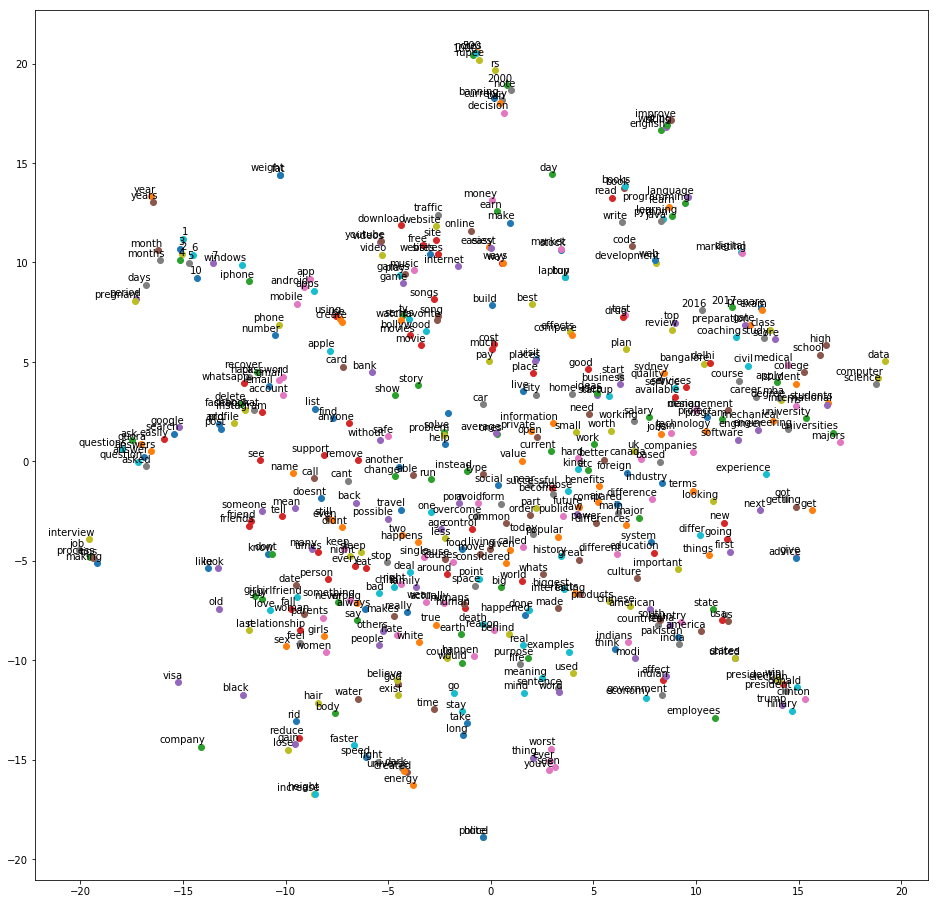

In [19]:
tsne_plot(model)

2018-10-15 08:33:45,434: INFO: collecting all words and their counts
2018-10-15 08:33:45,435: INFO: PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2018-10-15 08:33:45,451: INFO: PROGRESS: at sentence #10000, processed 54852 words, keeping 12150 word types
2018-10-15 08:33:45,466: INFO: PROGRESS: at sentence #20000, processed 109242 words, keeping 17750 word types
2018-10-15 08:33:45,483: INFO: PROGRESS: at sentence #30000, processed 163278 words, keeping 22001 word types
2018-10-15 08:33:45,499: INFO: PROGRESS: at sentence #40000, processed 218244 words, keeping 25617 word types
2018-10-15 08:33:45,515: INFO: PROGRESS: at sentence #50000, processed 272507 words, keeping 28581 word types
2018-10-15 08:33:45,531: INFO: PROGRESS: at sentence #60000, processed 328266 words, keeping 30608 word types
2018-10-15 08:33:45,547: INFO: PROGRESS: at sentence #70000, processed 383144 words, keeping 32457 word types
2018-10-15 08:33:45,563: INFO: PROGRESS: at sentence #80000, proc

137


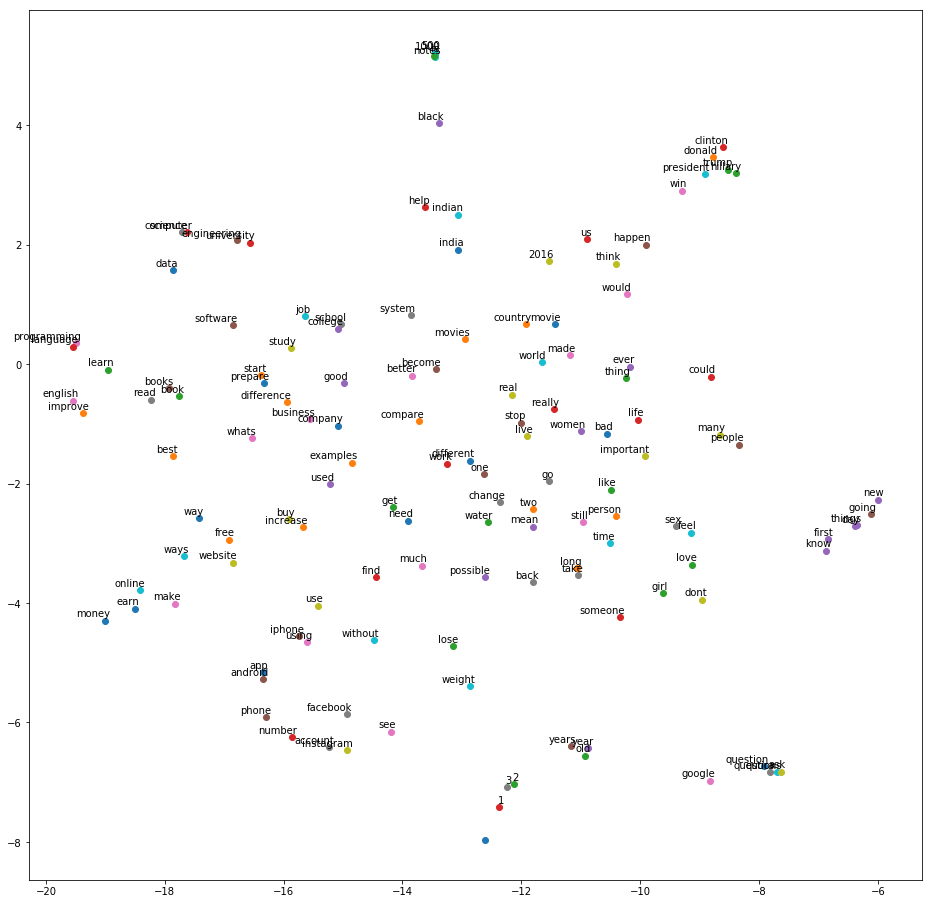

In [59]:
# A more selective model
model = word2vec.Word2Vec(corpus, size=100, window=20, min_count=500, workers=4)
print(len(model.wv.vocab))
tsne_plot(model)

2018-10-15 08:34:08,720: INFO: collecting all words and their counts
2018-10-15 08:34:08,721: INFO: PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2018-10-15 08:34:08,735: INFO: PROGRESS: at sentence #10000, processed 54852 words, keeping 12150 word types
2018-10-15 08:34:08,749: INFO: PROGRESS: at sentence #20000, processed 109242 words, keeping 17750 word types
2018-10-15 08:34:08,764: INFO: PROGRESS: at sentence #30000, processed 163278 words, keeping 22001 word types
2018-10-15 08:34:08,779: INFO: PROGRESS: at sentence #40000, processed 218244 words, keeping 25617 word types
2018-10-15 08:34:08,795: INFO: PROGRESS: at sentence #50000, processed 272507 words, keeping 28581 word types
2018-10-15 08:34:08,813: INFO: PROGRESS: at sentence #60000, processed 328266 words, keeping 30608 word types
2018-10-15 08:34:08,831: INFO: PROGRESS: at sentence #70000, processed 383144 words, keeping 32457 word types
2018-10-15 08:34:08,848: INFO: PROGRESS: at sentence #80000, proc

997


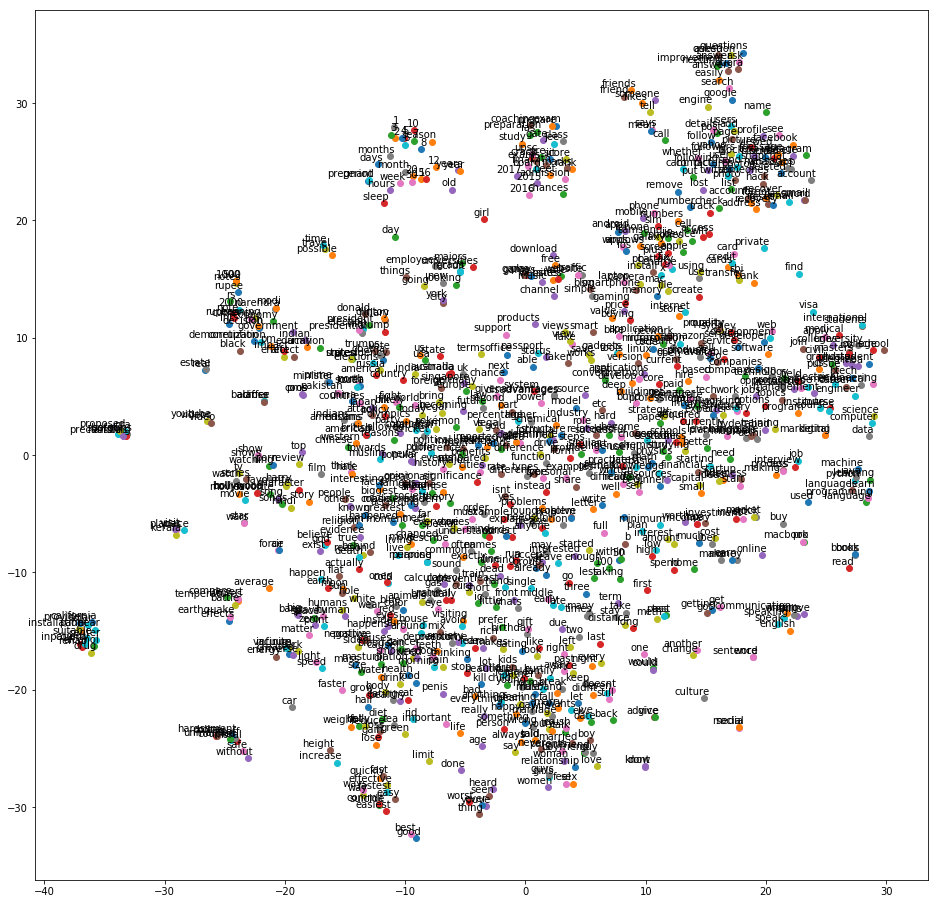

In [60]:
# A less selective model
model = word2vec.Word2Vec(corpus, size=100, window=20, min_count=100, workers=4)
print(len(model.wv.vocab))
tsne_plot(model)

In [24]:
model.wv.most_similar('trump')

/usr/local/lib/python3.5/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('trumps', 0.8958128094673157),
 ('hillary', 0.8434404730796814),
 ('president', 0.8408074975013733),
 ('bill', 0.8365374803543091),
 ('obama', 0.7990017533302307),
 ('election', 0.7968335151672363),
 ('vote', 0.7876169085502625),
 ('becoming', 0.7870199680328369),
 ('russia', 0.766068696975708),
 ('america', 0.7643547058105469)]

In [25]:
model.wv.most_similar('universe')

/usr/local/lib/python3.5/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('created', 0.9335585236549377),
 ('zero', 0.931493878364563),
 ('space', 0.9301868677139282),
 ('vacuum', 0.9251124858856201),
 ('dark', 0.9109879732131958),
 ('energy', 0.9037045240402222),
 ('infinite', 0.900241494178772),
 ('gravity', 0.8748054504394531),
 ('light', 0.8624504804611206),
 ('point', 0.8524429798126221)]

In [28]:
model.wv.most_similar('china')

/usr/local/lib/python3.5/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('policy', 0.8984241485595703),
 ('japan', 0.8759133815765381),
 ('countries', 0.8607234954833984),
 ('pakistan', 0.8579732775688171),
 ('attack', 0.8564354181289673),
 ('americans', 0.8399715423583984),
 ('minister', 0.8350449800491333),
 ('muslims', 0.8308053016662598),
 ('party', 0.8297033905982971),
 ('south', 0.8279887437820435)]

In [56]:
model.wv.most_similar('money')

/usr/local/lib/python3.5/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('uber', 0.7524344325065613),
 ('earn', 0.7473929524421692),
 ('investment', 0.7196835279464722),
 ('income', 0.7155395150184631),
 ('corruption', 0.7118628621101379),
 ('save', 0.6957900524139404),
 ('pay', 0.6651239395141602),
 ('youtube', 0.6415500640869141),
 ('amount', 0.6411832571029663),
 ('invest', 0.6352323293685913)]

### 1.33 预训练好的词迁入pretrained word embeddings 【2018-10-10】

https://github.com/keras-team/keras/blob/master/examples/pretrained_word_embeddings.py

In [1]:
import tensorflow as tf
from keras.backend.tensorflow_backend import set_session
config = tf.ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.3
set_session(tf.Session(config=config))

Using TensorFlow backend.


In [135]:
'''This script loads pre-trained word embeddings (GloVe embeddings)
into a frozen Keras Embedding layer, and uses it to
train a text classification model on the 20 Newsgroup dataset
(classification of newsgroup messages into 20 different categories).
GloVe embedding data can be found at:
http://nlp.stanford.edu/data/glove.6B.zip
(source page: http://nlp.stanford.edu/projects/glove/)
20 Newsgroup data can be found at:
http://www.cs.cmu.edu/afs/cs.cmu.edu/project/theo-20/www/data/news20.html
'''

from __future__ import print_function

import os
import sys
import numpy as np
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical
from keras.layers import Dense, Input, GlobalMaxPooling1D
from keras.layers import Conv1D, MaxPooling1D, Embedding
from keras.models import Model
from keras.initializers import Constant


BASE_DIR = os.path.join(current_data_path, 'word_embeddings')
GLOVE_DIR = os.path.join(BASE_DIR, 'glove.6B')
TEXT_DATA_DIR = os.path.join(BASE_DIR, '20_newsgroup')
MAX_SEQUENCE_LENGTH = 1000
MAX_NUM_WORDS = 20000
EMBEDDING_DIM = 50
VALIDATION_SPLIT = 0.2


In [136]:
# first, build index mapping words in the embeddings set
# to their embedding vector

print('Indexing word vectors.')

embeddings_index = {}
with open(os.path.join(GLOVE_DIR, 'glove.6B.' + str(EMBEDDING_DIM)+ 'd.txt'), encoding="utf-8") as f:
    for line in f:
        values = line.split()
        word = values[0]
        coefs = np.asarray(values[1:], dtype='float32')
        embeddings_index[word] = coefs

print('Found %s word vectors.' % len(embeddings_index))        

Indexing word vectors.
Found 400000 word vectors.


In [137]:
# print(embeddings_index['good'])

In [138]:
sys.version_info

sys.version_info(major=3, minor=5, micro=2, releaselevel='final', serial=0)

In [139]:
# second, prepare text samples and their labels
print('Processing text dataset')

texts = []  # list of text samples
labels_index = {}  # dictionary mapping label name to numeric id
labels = []  # list of label ids
for name in sorted(os.listdir(TEXT_DATA_DIR)):
    path = os.path.join(TEXT_DATA_DIR, name)
    if os.path.isdir(path):
        label_id = len(labels_index)
        labels_index[name] = label_id
        for fname in sorted(os.listdir(path)):            
            if fname.isdigit():
                fpath = os.path.join(path, fname)
                args = {} if sys.version_info < (3,) else {'encoding': 'latin-1'}
                with open(fpath, **args) as f:
                    t = f.read()
                    i = t.find('\n\n')  # skip header
                    if 0 < i:
                        t = t[i:]
                    texts.append(t)
                labels.append(label_id)

print('Found %s texts.' % len(texts))


Processing text dataset
Found 19997 texts.


In [140]:
print(texts[10])
print(labels[10])
print(len(labels_index), labels_index)



livesey@solntze.wpd.sgi.com (Jon Livesey) writes:

>>>How long does it [the motto] have to stay around before it becomes the
>>>default?  ...  Where's the cutoff point? 
>>I don't know where the exact cutoff is, but it is at least after a few
>>years, and surely after 40 years.
>Why does the notion of default not take into account changes
>in population makeup?     

Specifically, which changes are you talking about?  Are you arguing
that the motto is interpreted as offensive by a larger portion of the
population now than 40 years ago?

keith

0
20 {'rec.autos': 7, 'talk.religion.misc': 19, 'misc.forsale': 6, 'comp.sys.mac.hardware': 4, 'talk.politics.misc': 18, 'sci.med': 13, 'rec.motorcycles': 8, 'comp.os.ms-windows.misc': 2, 'talk.politics.guns': 16, 'sci.electronics': 12, 'comp.windows.x': 5, 'rec.sport.baseball': 9, 'talk.politics.mideast': 17, 'soc.religion.christian': 15, 'comp.graphics': 1, 'comp.sys.ibm.pc.hardware': 3, 'alt.atheism': 0, 'sci.crypt': 11, 'sci.space': 14, 're

In [141]:

# finally, vectorize the text samples into a 2D integer tensor
tokenizer = Tokenizer(num_words=MAX_NUM_WORDS)
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)


word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))  #问题是，为何词汇量超过了MAX_NUM_WORDS

Found 174074 unique tokens.


In [180]:
print(sequences[10])
print(type(sequences))
print(tokenizer.index_word[sequences[10][0]])
print(tokenizer.index_word[1])
print(tokenizer.index_word[2])

[2468, 4629, 4341, 1188, 49, 1279, 2468, 43, 80, 232, 88, 11, 1, 5261, 18, 2, 1421, 244, 177, 11, 1974, 1, 1988, 10187, 1, 17070, 180, 7, 65, 74, 142, 1, 2032, 17070, 8, 24, 11, 8, 31, 258, 154, 4, 234, 198, 5, 2185, 154, 489, 198, 121, 88, 1, 2978, 3, 1988, 17, 179, 119, 1295, 1452, 6, 902, 1547, 61, 1452, 19, 13, 599, 44, 19, 13, 3773, 9, 1, 5261, 8, 5070, 21, 3104, 30, 4, 1792, 3561, 3, 1, 902, 113, 82, 489, 198, 449, 1302]
<class 'list'>
livesey
the
to


In [172]:
data = pad_sequences(sequences, maxlen=MAX_SEQUENCE_LENGTH)
labels = to_categorical(np.asarray(labels))
print('Shape of data tensor:', data.shape)
print('Shape of label tensor:', labels.shape)

# print(data[10])
print(labels[0:10,])

Shape of data tensor: (19997, 1000)
Shape of label tensor: (19997, 20, 2)
[    0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0  

In [144]:
# split the data into a training set and a validation set
indices = np.arange(data.shape[0])
np.random.shuffle(indices)
data = data[indices]
labels = labels[indices]
num_validation_samples = int(VALIDATION_SPLIT * data.shape[0])

x_train = data[:-num_validation_samples]
y_train = labels[:-num_validation_samples]
x_val = data[-num_validation_samples:]
y_val = labels[-num_validation_samples:]

In [145]:
print('Preparing embedding matrix.')

# prepare embedding matrix
num_words = min(MAX_NUM_WORDS, len(word_index)) + 1
embedding_matrix = np.zeros((num_words, EMBEDDING_DIM))
for word, i in word_index.items():
    if i > MAX_NUM_WORDS:
        continue
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        # words not found in embedding index will be all-zeros.
        embedding_matrix[i] = embedding_vector


Preparing embedding matrix.


In [146]:
print(embedding_matrix.shape)

(20001, 50)


In [147]:
print('Training model.')

# load pre-trained word embeddings into an Embedding layer
# note that we set trainable = False so as to keep the embeddings fixed
embedding_layer = Embedding(num_words,
                            EMBEDDING_DIM,
                            embeddings_initializer=Constant(embedding_matrix),
                            input_length=MAX_SEQUENCE_LENGTH,
                            trainable=False)

# train a 1D convnet with global maxpooling
sequence_input = Input(shape=(MAX_SEQUENCE_LENGTH,), dtype='int32')
embedded_sequences = embedding_layer(sequence_input)
x = Conv1D(128, 5, activation='relu')(embedded_sequences)
x = MaxPooling1D(5)(x)
x = Conv1D(128, 5, activation='relu')(x)
x = MaxPooling1D(5)(x)
x = Conv1D(128, 5, activation='relu')(x)
x = GlobalMaxPooling1D()(x)
x = Dense(128, activation='relu')(x)
preds = Dense(len(labels_index), activation='softmax')(x)

model = Model(sequence_input, preds)
model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['acc'])

history = model.fit(x_train, y_train,
          batch_size=128,
          epochs=15,
          validation_data=(x_val, y_val))

Training model.
Train on 15998 samples, validate on 3999 samples
Epoch 1/15
15998/15998 [==============================] - 4s 269us/step - loss: 2.3324 - acc: 0.2268 - val_loss: 1.9234 - val_acc: 0.3153
Epoch 2/15
15998/15998 [==============================] - 3s 158us/step - loss: 1.5817 - acc: 0.4438 - val_loss: 1.4584 - val_acc: 0.4821
Epoch 3/15
15998/15998 [==============================] - 3s 158us/step - loss: 1.2855 - acc: 0.5516 - val_loss: 1.1896 - val_acc: 0.5941
Epoch 4/15
15998/15998 [==============================] - 3s 157us/step - loss: 1.0774 - acc: 0.6258 - val_loss: 1.1690 - val_acc: 0.6067
Epoch 5/15
15998/15998 [==============================] - 3s 158us/step - loss: 0.9340 - acc: 0.6813 - val_loss: 1.0107 - val_acc: 0.6612
Epoch 6/15
15998/15998 [==============================] - 3s 158us/step - loss: 0.8100 - acc: 0.7209 - val_loss: 1.0782 - val_acc: 0.6554
Epoch 7/15
15998/15998 [==============================] - 3s 157us/step - loss: 0.7079 - acc: 0.7595 - val_

       accuracy
train  0.934804
val    0.700675


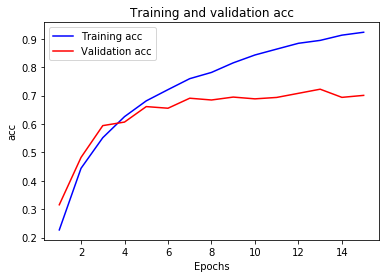

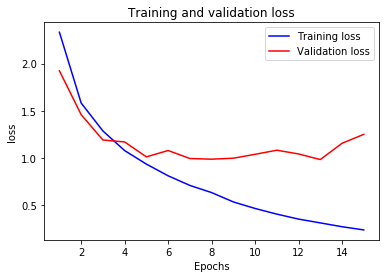

In [148]:
from eipi10.ml2.utils import *
from eipi10.ml2.predictor import *


print(MultiClassificationPredictor(model).evaluates(x_train, y_train, x_val, y_val))
plot_epochs(history, 'acc')
plot_epochs(history, 'loss')




如果把trainable改成true, 结果要好不少。

In [149]:
print('Training model.')

embedding_layer = Embedding(num_words,
                            EMBEDDING_DIM,
                            embeddings_initializer=Constant(embedding_matrix),
                            input_length=MAX_SEQUENCE_LENGTH,
                            trainable=True)   

# train a 1D convnet with global maxpooling
sequence_input = Input(shape=(MAX_SEQUENCE_LENGTH,), dtype='int32')
embedded_sequences = embedding_layer(sequence_input)
x = Conv1D(128, 5, activation='relu')(embedded_sequences)
x = MaxPooling1D(5)(x)
x = Conv1D(128, 5, activation='relu')(x)
x = MaxPooling1D(5)(x)
x = Conv1D(128, 5, activation='relu')(x)
x = GlobalMaxPooling1D()(x)
x = Dense(128, activation='relu')(x)
preds = Dense(len(labels_index), activation='softmax')(x)

model = Model(sequence_input, preds)
model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['acc'])

history = model.fit(x_train, y_train,
          batch_size=128,
          epochs=15,
          validation_data=(x_val, y_val))

Training model.
Train on 15998 samples, validate on 3999 samples
Epoch 1/15
15998/15998 [==============================] - 5s 318us/step - loss: 2.3664 - acc: 0.2197 - val_loss: 2.0792 - val_acc: 0.3023
Epoch 2/15
15998/15998 [==============================] - 3s 202us/step - loss: 1.5256 - acc: 0.4592 - val_loss: 1.3677 - val_acc: 0.5289
Epoch 3/15
15998/15998 [==============================] - 3s 202us/step - loss: 1.1758 - acc: 0.5847 - val_loss: 1.1749 - val_acc: 0.5924
Epoch 4/15
15998/15998 [==============================] - 3s 202us/step - loss: 0.9283 - acc: 0.6815 - val_loss: 1.1120 - val_acc: 0.6274
Epoch 5/15
15998/15998 [==============================] - 3s 202us/step - loss: 0.7574 - acc: 0.7452 - val_loss: 0.8832 - val_acc: 0.7197
Epoch 6/15
15998/15998 [==============================] - 3s 202us/step - loss: 0.6178 - acc: 0.7923 - val_loss: 0.9978 - val_acc: 0.6962
Epoch 7/15
15998/15998 [==============================] - 3s 202us/step - loss: 0.5117 - acc: 0.8290 - val_

       accuracy
train  0.962370
val    0.762441


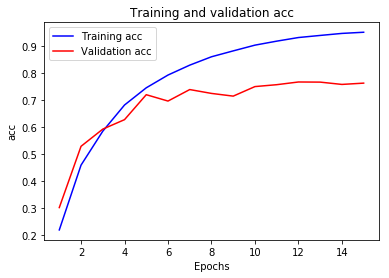

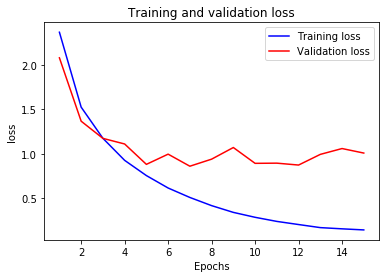

In [150]:
print(MultiClassificationPredictor(model).evaluates(x_train, y_train, x_val, y_val))
plot_epochs(history, 'acc')
plot_epochs(history, 'loss')


如果不使用预先training好的词向量，看看结果如何 。 收敛的速度比较慢一些，但从最终结果来看，也还不错。

In [151]:
print('Training model.')

embedding_layer = Embedding(num_words,
                            EMBEDDING_DIM,
                            input_length=MAX_SEQUENCE_LENGTH)

# train a 1D convnet with global maxpooling
sequence_input = Input(shape=(MAX_SEQUENCE_LENGTH,), dtype='int32')
embedded_sequences = embedding_layer(sequence_input)
x = Conv1D(128, 5, activation='relu')(embedded_sequences)
x = MaxPooling1D(5)(x)
x = Conv1D(128, 5, activation='relu')(x)
x = MaxPooling1D(5)(x)
x = Conv1D(128, 5, activation='relu')(x)
x = GlobalMaxPooling1D()(x)
x = Dense(128, activation='relu')(x)
preds = Dense(len(labels_index), activation='softmax')(x)

model = Model(sequence_input, preds)
model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['acc'])

history = model.fit(x_train, y_train,
          batch_size=128,
          epochs=15,
          validation_data=(x_val, y_val))

Training model.
Train on 15998 samples, validate on 3999 samples
Epoch 1/15
15998/15998 [==============================] - 5s 318us/step - loss: 2.7449 - acc: 0.0993 - val_loss: 2.3446 - val_acc: 0.1665
Epoch 2/15
15998/15998 [==============================] - 3s 202us/step - loss: 2.2047 - acc: 0.1951 - val_loss: 2.1358 - val_acc: 0.2191
Epoch 3/15
15998/15998 [==============================] - 3s 202us/step - loss: 1.9314 - acc: 0.2810 - val_loss: 1.8736 - val_acc: 0.3163
Epoch 4/15
15998/15998 [==============================] - 3s 202us/step - loss: 1.5888 - acc: 0.4146 - val_loss: 1.6742 - val_acc: 0.4384
Epoch 5/15
15998/15998 [==============================] - 3s 202us/step - loss: 1.2670 - acc: 0.5489 - val_loss: 1.5732 - val_acc: 0.4909
Epoch 6/15
15998/15998 [==============================] - 3s 202us/step - loss: 0.9933 - acc: 0.6591 - val_loss: 1.3668 - val_acc: 0.5796
Epoch 7/15
15998/15998 [==============================] - 3s 203us/step - loss: 0.8032 - acc: 0.7307 - val_

       accuracy
train  0.927178
val    0.668417


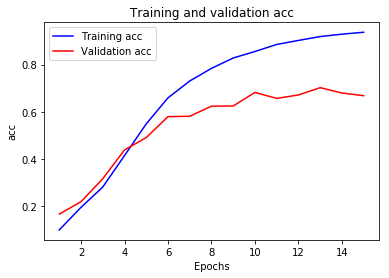

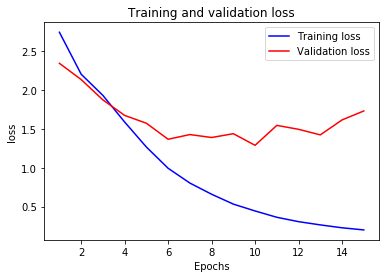

3999/3999 [==============================] - 0s 86us/step
[1.7313508093729708, 0.6684171041270202]


In [152]:
print(MultiClassificationPredictor(model).evaluates(x_train, y_train, x_val, y_val))
plot_epochs(history, 'acc')
plot_epochs(history, 'loss')

#keras 模型评估的结果
score = model.evaluate(x_val, y_val, verbose=1)
print(score)

在 15 epochs后， 结果比较：

- EMBEDDING_DIM = 50
    - pretrained word embeddings
        - acc: 0.700675
        - overfitting: 严重
        - 收敛速度: 快
    - pretrained word embeddings
        - acc:  0.762441
        - overfitting: 严重
        - 收敛速度: 快    
    - no pretrained word embeddings
        - acc: 0.668417
        - overfitting: 严重
        - 收敛速度: 慢一些 

- EMBEDDING_DIM = 100
    - pretrained word embeddings
        - acc: 0.753938
        - overfitting: 严重
        - 收敛速度: 快
    - pretrained word embeddings
        - acc: 0.792448
        - overfitting: 严重
        - 收敛速度: 快    
    - no pretrained word embeddings
        - acc: 0.725181
        - overfitting: 严重
        - 收敛速度: 慢一些    
        
- EMBEDDING_DIM = 200  
    - pretrained word embeddings
        - acc: 0.775944
        - overfitting: 严重
        - 收敛速度: 快
    - pretrained word embeddings
        - acc: 0.803701
        - overfitting: 严重
        - 收敛速度: 快    
    - no pretrained word embeddings
        - acc: 0.765691
        - overfitting: 严重
        - 收敛速度: 慢一些  

下面尝试一下更加简单一点的模型。发现性能其实还是不错的。

In [167]:
from keras.layers import InputLayer, GlobalAveragePooling1D, CuDNNGRU
from keras.models import Sequential

def get_simple_model():    
    embedding_layer = Embedding(num_words,
                                EMBEDDING_DIM,
                                embeddings_initializer=Constant(embedding_matrix),
                                input_length=MAX_SEQUENCE_LENGTH,
                                trainable=True)      

    model = Sequential()
    model.add(InputLayer([None], dtype='int32'))
    model.add(embedding_layer)
    model.add(GlobalAveragePooling1D())
    model.add(Dense(128, activation='relu'))     
    model.add(Dense(len(labels_index), activation='softmax'))

    model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
    
    return model    

def get_model_gru():
    embedding_layer = Embedding(num_words,
                                EMBEDDING_DIM,
                                embeddings_initializer=Constant(embedding_matrix),
                                input_length=MAX_SEQUENCE_LENGTH,
                                trainable=True)      

    model = Sequential()
    model.add(InputLayer([None], dtype='int32'))
    model.add(embedding_layer)
    model.add(CuDNNGRU(128,return_sequences=False))

    model.add(Dense(128, activation='relu'))     
    model.add(Dense(len(labels_index), activation='softmax'))

    model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
    
    return model

In [171]:
model = get_simple_model()

history = model.fit(x_train, y_train,
          batch_size=128,
          epochs=50,
          validation_data=(x_val, y_val))

Train on 15998 samples, validate on 3999 samples
Epoch 1/50
15998/15998 [==============================] - 3s 176us/step - loss: 2.8992 - acc: 0.1220 - val_loss: 2.7954 - val_acc: 0.1910
Epoch 2/50
15998/15998 [==============================] - 1s 61us/step - loss: 2.6835 - acc: 0.2330 - val_loss: 2.5536 - val_acc: 0.2678
Epoch 3/50
15998/15998 [==============================] - 1s 61us/step - loss: 2.4257 - acc: 0.3270 - val_loss: 2.3087 - val_acc: 0.3773
Epoch 4/50
15998/15998 [==============================] - 1s 61us/step - loss: 2.1974 - acc: 0.3784 - val_loss: 2.1186 - val_acc: 0.4144
Epoch 5/50
15998/15998 [==============================] - 1s 61us/step - loss: 2.0186 - acc: 0.4262 - val_loss: 1.9679 - val_acc: 0.4261
Epoch 6/50
15998/15998 [==============================] - 1s 61us/step - loss: 1.8723 - acc: 0.4604 - val_loss: 1.8482 - val_acc: 0.4746
Epoch 7/50
15998/15998 [==============================] - 1s 61us/step - loss: 1.7466 - acc: 0.4942 - val_loss: 1.7431 - val_acc

       accuracy
train  0.921178
val    0.795949


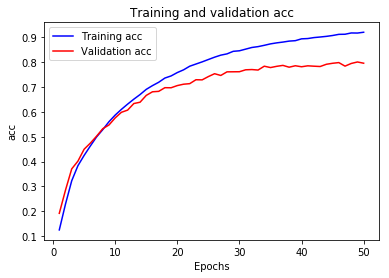

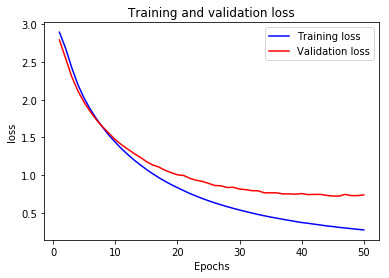

3999/3999 [==============================] - 0s 39us/step
[0.7382049073306105, 0.7959489870530482]


In [165]:
print(MultiClassificationPredictor(model).evaluates(x_train, y_train, x_val, y_val))
plot_epochs(history, 'acc')
plot_epochs(history, 'loss')


#keras 模型评估的结果
score = model.evaluate(x_val, y_val, verbose=1)
print(score)

In [169]:
model = get_model_gru()

history = model.fit(x_train, y_train,
          batch_size=128,
          epochs=15,
          validation_data=(x_val, y_val))

Train on 15998 samples, validate on 3999 samples
Epoch 1/15
15998/15998 [==============================] - 9s 564us/step - loss: 2.6377 - acc: 0.1700 - val_loss: 2.2974 - val_acc: 0.2413
Epoch 2/15
15998/15998 [==============================] - 7s 459us/step - loss: 2.0396 - acc: 0.3083 - val_loss: 1.9740 - val_acc: 0.3491
Epoch 3/15
15998/15998 [==============================] - 7s 462us/step - loss: 1.5957 - acc: 0.4498 - val_loss: 1.4865 - val_acc: 0.4759
Epoch 4/15
15998/15998 [==============================] - 7s 464us/step - loss: 1.2061 - acc: 0.5779 - val_loss: 1.1557 - val_acc: 0.6034
Epoch 5/15
15998/15998 [==============================] - 7s 463us/step - loss: 0.9633 - acc: 0.6610 - val_loss: 1.0597 - val_acc: 0.6364
Epoch 6/15
15998/15998 [==============================] - 7s 464us/step - loss: 0.7937 - acc: 0.7242 - val_loss: 0.9748 - val_acc: 0.6704
Epoch 7/15
15998/15998 [==============================] - 7s 460us/step - loss: 0.6535 - acc: 0.7741 - val_loss: 0.8564 - v

       accuracy
train  0.953619
val    0.792198


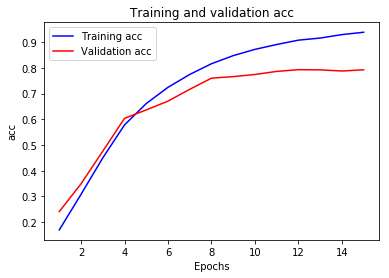

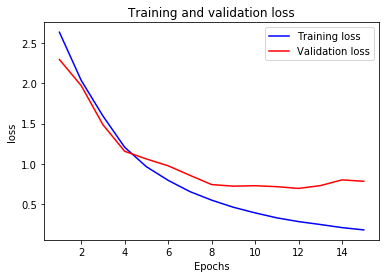

3999/3999 [==============================] - 2s 616us/step
[0.7815118917199069, 0.7921980495719977]


In [170]:
print(MultiClassificationPredictor(model).evaluates(x_train, y_train, x_val, y_val))
plot_epochs(history, 'acc')
plot_epochs(history, 'loss')


#keras 模型评估的结果
score = model.evaluate(x_val, y_val, verbose=1)
print(score)

### 1.32 tensorflow 模型的保存和恢复【2018-10-02】

see http://aa00:18888/notebooks/eipi10/python-book/arsenal/notebook/dl/tensorflow/tensorflow_tutorial.ipynb#1.25-Save-and-restore-models

### 1.31 Latent Dirichlet Allocation

**history**
- 初始【2018-09-12】

**reference**
- [LDA 数学八卦](http://www.victoriawy.com/wp-content/uploads/2017/12/LDA%E6%95%B0%E5%AD%A6%E5%85%AB%E5%8D%A6.pdf)

看起来这个算法还比较复杂，以后慢慢再添加

### 1.30 Conditional Random Fields(CRF) 条件随机场  

**history**
- 初始【2018-09-06】

**reference**
- [如何轻松愉快地理解条件随机场（CRF）？](https://www.jianshu.com/p/55755fc649b1)：这篇文章写的非常好懂，对条件随机场大概也有了感性认识。现在感觉还是缺乏一个实际的代码来实验。



### 1.29 pandas读取数据库（Database） 【2018-08-23】

[Python中从SQL型数据库读写dataframe型数据](http://www.cnblogs.com/arkenstone/p/6271923.html)

In [82]:
import pymysql
import pandas as pd
import numpy as np

def get_connection(host='15.15.165.218', port=3306, user='grid', password='grid' ):
    """
    :return: return the pre-connect database
    """
    connection = pymysql.connect(host=host,
                         user=user,
                         password=password,
                         port=port,
                         charset='utf8', #'utf8mb4'
                         use_unicode=True,)
    return connection

conn = get_connection()
sql = 'select customer_id, openid, custom_name, nickname from customer_service_prod.up_customer limit 1000  ;'
df = pd.read_sql(sql, conn)
print(len(df))
conn.close()

1000


### 1.28 sklearn提供的自带的数据集

In [1]:
from sklearn.datasets import load_iris
#加载数据集
iris=load_iris()
print(type(iris))
print(iris.keys()) #dict_keys(['target', 'DESCR', 'data', 'target_names', 'feature_names'])
#数据的条数和维数
n_samples,n_features=iris.data.shape
print("Number of sample:",n_samples)   #Number of sample: 150
print("Number of feature",n_features)   #Number of feature 4
#第一个样例
print(iris.data[0])     #[ 5.1  3.5  1.4  0.2]
print(iris.data.shape)   #(150, 4)
print(iris.target.shape)  #(150,)
print(iris.target)

<class 'sklearn.utils.Bunch'>
dict_keys(['DESCR', 'feature_names', 'target_names', 'target', 'data'])
Number of sample: 150
Number of feature 4
[5.1 3.5 1.4 0.2]
(150, 4)
(150,)
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [22]:
from sklearn.datasets import load_boston
boston = load_boston()
print(boston.keys())

print(boston.feature_names)
print(boston.data[0:2])

dict_keys(['target', 'feature_names', 'DESCR', 'data'])
['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']
[[6.3200e-03 1.8000e+01 2.3100e+00 0.0000e+00 5.3800e-01 6.5750e+00
  6.5200e+01 4.0900e+00 1.0000e+00 2.9600e+02 1.5300e+01 3.9690e+02
  4.9800e+00]
 [2.7310e-02 0.0000e+00 7.0700e+00 0.0000e+00 4.6900e-01 6.4210e+00
  7.8900e+01 4.9671e+00 2.0000e+00 2.4200e+02 1.7800e+01 3.9690e+02
  9.1400e+00]]


### 1.27 sklearn分层抽样


In [80]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
from collections import Counter
from sklearn.model_selection import StratifiedShuffleSplit  #

def print_ratio(counter):
    print(sum(counter.values()), [(item, round(counter[item] / sum(counter.values()),2) * 100.0) for item in counter])

iris=load_iris()

labels = iris.target[0:120]
data = iris.data[0:120]



origin_counter = Counter(labels) 
print_ratio(origin_counter)

sss = StratifiedShuffleSplit(n_splits=3, test_size=0.2, random_state=0)
for train_index, test_index in sss.split(data, labels):
    print('-'*100)
    xtrain, xtest = data[train_index], data[test_index]
    ytrain, ytest = target[train_index], target[test_index]
    
    train_counter = Counter(ytrain) 
    test_counter = Counter(ytest) 
    print_ratio(train_counter)
    print_ratio(test_counter)
    print(ytrain)
    print(ytest)

# Check target series for distribution of classes

120 [(0, 42.0), (1, 42.0), (2, 17.0)]
----------------------------------------------------------------------------------------------------
96 [(0, 42.0), (1, 42.0), (2, 17.0)]
24 [(0, 42.0), (1, 42.0), (2, 17.0)]
[0 1 2 1 1 2 1 2 0 1 2 1 0 0 1 2 2 0 0 0 0 1 0 1 1 2 0 1 2 1 0 0 0 0 0 0 1
 0 2 1 0 1 1 0 1 2 1 2 2 0 1 0 1 0 1 1 0 1 0 1 0 1 1 0 0 1 1 1 2 0 0 0 1 0
 1 2 0 1 0 0 1 1 1 0 0 1 2 0 1 2 1 0 1 0 1 0]
[2 1 0 1 0 0 1 1 0 0 0 0 1 1 1 2 1 1 0 2 0 1 0 2]
----------------------------------------------------------------------------------------------------
96 [(0, 42.0), (1, 42.0), (2, 17.0)]
24 [(0, 42.0), (1, 42.0), (2, 17.0)]
[1 1 1 2 1 0 0 1 0 1 0 0 1 2 2 1 0 2 0 1 1 1 0 0 0 0 0 0 1 0 0 0 1 1 1 1 2
 0 0 2 0 1 0 2 0 1 1 1 0 0 0 0 0 1 2 2 0 0 1 0 1 0 1 2 1 0 2 1 1 1 1 1 2 2
 1 1 1 2 0 2 0 0 1 1 1 1 0 1 0 0 0 1 2 1 0 0]
[1 1 0 0 1 2 0 2 2 0 1 1 1 1 0 0 1 0 1 0 0 2 1 0]
----------------------------------------------------------------------------------------------------
96 [(0, 42.0), (1, 

In [81]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
from collections import Counter
from sklearn.cross_validation import StratifiedShuffleSplit  #cross_validation 在新的版本中已经废弃


iris=load_iris()

labels = iris.target[0:120]
data = iris.data[0:120]

origin_counter = Counter(target) 
print(origin_counter)

sss = StratifiedShuffleSplit(labels, n_iter=3, test_size=0.2, random_state=1031)
for train_index, test_index in sss:
    print('-'*100)
    xtrain, xtest = data[train_index], data[test_index]
    ytrain, ytest = target[train_index], target[test_index]
    
    train_counter = Counter(ytrain) 
    test_counter = Counter(ytest) 
    print_ratio(train_counter)
    print_ratio(test_counter)
    print(ytrain)
    print(ytest)

# Check target series for distribution of classes


Counter({0: 50, 1: 50, 2: 20})
----------------------------------------------------------------------------------------------------
96 [(0, 42.0), (1, 42.0), (2, 17.0)]
24 [(0, 42.0), (1, 42.0), (2, 17.0)]
[2 1 0 1 0 1 1 2 2 1 1 0 1 1 0 2 2 0 1 2 0 0 1 1 0 2 0 2 0 1 1 1 2 0 2 0 1
 1 0 0 0 1 1 2 2 2 1 0 1 0 0 0 1 1 1 0 0 0 1 1 2 2 0 0 1 0 0 0 0 1 1 0 0 0
 1 1 1 0 1 1 0 0 0 0 1 1 0 1 1 1 0 1 0 1 2 0]
[1 0 0 1 1 0 0 0 0 0 1 1 2 1 1 2 0 2 0 2 1 1 0 1]
----------------------------------------------------------------------------------------------------
96 [(0, 42.0), (1, 42.0), (2, 17.0)]
24 [(0, 42.0), (1, 42.0), (2, 17.0)]
[1 1 0 0 1 1 0 0 2 0 2 0 0 0 0 2 0 0 0 1 1 1 2 1 1 1 2 0 1 0 2 0 1 1 1 0 1
 0 0 0 0 2 0 1 2 1 1 0 1 1 0 0 1 0 1 0 0 2 2 0 2 0 2 1 0 1 0 0 1 1 1 0 1 2
 0 1 1 1 0 2 1 1 1 0 1 1 1 0 1 0 2 1 0 2 1 0]
[1 0 2 1 0 0 1 0 1 1 0 1 1 2 1 0 0 0 2 1 0 1 0 2]
----------------------------------------------------------------------------------------------------
96 [(0, 42.0), (1, 42.0), 

### 1.26 最大熵马尔科夫模型（Maximum Entropy Markov Model， MEMM） 

**reference**
- [结合Logistic回归构建最大熵马尔科夫模型](https://www.jiqizhixin.com/articles/2017-11-23-6)
- [Maximum Entropy Markov Models](http://www.cs.cornell.edu/courses/cs778/2006fa/lectures/05-memm.pdf): 比起大多数中文文章，这里面有很多细节，点赞。

![hmm_vs_memm](./image/hmm_vs_memm.png)


从上图中，可以看到HMM和MEMM的区别。在HMM中有两个概率分布（一个是状态转移矩阵，一个是状态-观测转移矩阵），而在MEMM要稍微复杂一些，对于每一个状态和观测，到下一个状态，都有一个概率分布。

### 1.25 概率图模型（Probabilistic Graphical Model） [2018-08-08]

**reference**
- [概率图模型体系：HMM、MEMM、CRF](https://zhuanlan.zhihu.com/p/33397147)


![PGM](./image/probabilistic_graphical_model_category.jpg)

概率图模型指用图表示变量相关（依赖）关系的概率模型，主要分为两类：

- 有向图模型或贝叶斯网（Bayesian network），使用有向图表示变量间的依赖关系；
- 无向图模型或马尔可夫网（Markov network），使用无向图表示变量间相关关系。

监督学习的任务就是学习一个模型，对于给定的输入X，能预测出类别Y。所学习到的模型一般可表示为决策函数：
$$\begin{equation} 
Y = f(X) 
\tag{1} 
\end{equation}$$

或者为条件概率

$$ \begin{equation} 
\arg \mathop{max}\limits_{Y} P(Y|X) 
\tag{2} 
\end{equation}$$

监督学习的模型分为生成模型（generative model）与判别模型（discriminative model）。生成模型学习联合概率分布$P(X,Y)$，然后通过贝叶斯定理求解条件概率$(2)$，而判别模型则是直接学习决策函数$(1)$或条件概率$(2)$。

- 生成模型（generative model）
先从训练样本数据中，将所有的数据的分布情况摸透，然后最终确定一个分布，来作为我的所有的输入数据的分布，并且它是一个联合分布 $P(X,Y)$ (注意 $X $包含所有的特征 $x_{i}$ ， $Y$ 包含所有的label)。然后我来了新的样本数据（inference），好，通过学习来的模型的联合分布$ P(X,Y)$ ，再结合新样本给的 $X $，通过条件概率就能出来$ Y $：

$$P(Y|X) = \frac{P(X,Y)}{P(X)} $$
    
- 判别模型（discriminative model）
直接将数据的$Y$（或者label），根据所提供的features，学习，最后画出了一个明显或者比较明显的边界（具体怎么做到的？通过复杂的函数映射，或者决策叠加等等mechanism），这一点线性LR、线性SVM应该很明显吧。

![generative_discriminative](./image/generative_discriminative.jpg)

### 1.24 拉格朗日乘法（Lagrange multiplier）  [2018-07-25]

**history**
-  [2018-07-25]  优化
-  [2018-07-26]  KTT几何意义
-  [2018-08-01]  增加等式约束条件 
-  [2018-08-02]  增加弱对偶的几个例子以及证明
-  [2018-08-03]  强对偶和KKT条件

**reference**
- [1] [【直观详解】拉格朗日乘法和KKT条件](https://charlesliuyx.github.io/2017/09/20/%E6%8B%89%E6%A0%BC%E6%9C%97%E6%97%A5%E4%B9%98%E6%B3%95%E5%92%8CKKT%E6%9D%A1%E4%BB%B6/)  
- [2] [5 Lagrange duality](http://cs229.stanford.edu/notes/cs229-notes3.pdf)  ：斯坦福CS229里面的教材
- [3] [真正理解拉格朗日乘子法和 KKT 条件](https://www.cnblogs.com/xinchen1111/p/8804858.html): 非常通俗易懂，里面有不少非常形象的图片 
- [4] [如何通俗地讲解对偶问题？尤其是拉格朗日对偶lagrangian duality？](https://www.zhihu.com/question/58584814/answer/159863739): 这条知乎里面的答案，非常形象具体，很好理解，赞。

优化问题可以分为三种

- 无约束的优化问题
- 带等式约束的优化问题
- 带不等式约束的优化问题

**带等式约束的优化问题**  
源自[3]

$$\begin{align} & \min_x \ f(x)       \\ 
 s.t. \  \  & h_i(x) =0, i=1,...,p
\end{align}
$$

首先我们考虑单个约束。

$$\begin{align} & \min_x \ f(x)       \\     
 s.t. \  \  & h(x) =0   
\end{align}
$$

![lagrange_multiplier_one_constraint](./image/lagrange_multiplier_one_constraint.png)

   如图，其中的圆圈是指目标函数$ f(x)$ 投影在平面上的等值线，表示在同一个圆圈上，黑线是约束条件 $h(x)=0 $的函数图像。可以推断极值点只有可能在等值线与函数图像相切的地方取到，因为如果在相交的地方取到，那么沿着 $h(x)$ 的图像往前走或者往后走，一定还有其它的等值线与它相交，也就是 $f(x)$ 的值还能变大和变小，所以交点不是极值点，只有相切的时候才有可能是极值点(不可能同时变大和变小了)。在相切的地方 $h(x) $的梯度和 $f(x)$ 的梯度应该是在同一条直线上的。  
      
   所以满足条件的极值点一定满足：$\nabla{f(x)}=\lambda \nabla{h(x)}$ ( $λ=0$ 是允许的，表示 $f(x)$ 本身的极值点刚好在切点上,这种情况下$\nabla{h(x)}$可以去任何值)。根据这个结论，我们构造一个函数$  L (x, \lambda) = f(x)+\lambda h(x)$ （也就是拉格朗日函数）， 通过求导我们可以求这个新函数的极值的。
   
 $$\nabla{L(x, \lambda)}=  \nabla{f(x)} + \lambda \nabla{h(x)} = 0 $$ 
 
易见这个公式和前面的含义完全相同。这或许就是等式约束的拉格朗日乘法的数学含义。

再来看多约束等值约束。
![lagrange_multiplier_n_constraint](../../image/lagrange_multiplier_n_constraint.png)

这里的平面和球面分别代表了两个约束 $h_1(x)$ 和 $h_2(x)$，那么这个问题的可行域就是它们相交的那个圆。这里蓝色箭头表示平面的梯度，黑色箭头表示球面的梯度，那么相交的圆的梯度就是它们的线性组合（只是直观上的~），所以在极值点的地方目标函数的梯度和约束的梯度的线性组合在一条直线上。所以就满足：

$$\nabla f(x) = \lambda \sum_{i=1}^{2}\mu_{i}\nabla h_i(x)=\sum_{i=1}^{2}\lambda_{i}\nabla h_i(x)\\
h_1(x)=0\\
h_2(x)=0$$

大于2个约束的情况也一样。为了好记，将原来的约束的问题写成$ L(x,\lambda)=f(x)+\sum_{i=1}^{n}\lambda_{i}\nabla h_{i}(x)$的形式，然后对$ x、\lambda $ 求偏导，然后让它们为 0。

另外一种几何的理解是，可以把任何一个$ h_i(x)$看成是$m-1$维度的图形，比如，在三维坐标($m=3$)， 则$ h_i(x)$是一个曲面或平面，而在二维坐标($m=2$)，则$ h_i(x)$是一个曲线或直线。当多个$ h_i(x)$满足，相当于这些图形的相交，相交之后的图形的的维度是$m-n-1$，比如，曲面相交得到的是曲线，曲线相交得到的是点。这样可以把多个等值约束，可以看成是一个维度为$m-n-1$的图形，这样问题又变成单个等值约束啦。 



**带不等式约束的优化问题**

$$\begin{align} & \min_x \ f(x)       \\ 
 s.t. \  \  & g_i(x)\le 0, i=1,...,m \\ 
& h_i(x) =0, i=1,...,p
\end{align}
$$

我们把上述问题称之为原始问题或者$P$问题。要求解它，首先是如何把约束条件运用到求最小值的公式中。于是构造一个新问题：

$$\begin{align} &  \min_{x } \max_{\lambda \ge 0, v } L (x, \lambda, v)  \\ 
 & L (x, \lambda, v) = f(x) + \sum_{i=1}^m \lambda_i g_i(x)  + \sum_{i=1}^p v_i h_i(x) \\ 
  s.t. \  \  & g_i(x)\le 0, i=1,...,m \\ 
& h_i(x) =0, i=1,...,p
\end{align}$$



而这个新问题刚好等同于原始问题。其巧妙之处在于

- 当$x $满足所有约束   
仅当$\lambda = 0$，$\begin{align} \max_{\lambda \ge 0, v  } L (x, \lambda, v)\end{align}$取得最大值，也就是说 $\begin{align} \max_{\lambda \ge 0, v   } L (x, \lambda, v) = f(x)\end{align}$
- 当$x $不满足所有约束    
令$\lambda_i = +\infty  $，$\begin{align} \max_{\lambda \ge 0, v   } L (x, \lambda, v)\end{align}$取得最大值，也就是$\begin{align} \max_{\lambda \ge 0, v  } L (x, \lambda, v)\end{align} = +\infty $

合并以上两种情况，在满足各自条件的时候，这两个问题等价，也就是：

$$ \max_{\lambda \ge 0, v  } L (x, \lambda, v ) = \begin{equation}  
\left\{  
\begin{array}{lcl}  
 f(x)        &  &  当x满足所有约束  \\  
 +\infty &  & 其它  
\end{array}  
\right.  
\end{equation}    $$

$$\begin{align} & \min_x f(x) = 
 \min_{x }  \max_{\lambda \ge 0, v  } L (x, \lambda, v ) \end{align} $$

终于我们把一个约束问题转化成为了一个无约束问题。我们把这个无约束问题称之为$p^*$问题，也就是：

$$p^* = \begin{align} \min_{x }  \max_{\lambda \ge0, v  } L (x, \lambda, v ) \end{align} $$

**拉格朗日对偶**

上文中，我们找到了$p^*$问题，可直接求解它并不容易，所以我们再构造一个问题（也称对偶问题， Dual Problem）：

$$d^* = \begin{align} \max_{\lambda \ge0, v   }  \min_{x} L (x, \lambda, v ) \end{align}$$

原始问题和对偶问题形式上可以看出很对称，只不过原始问题是先固定$x$的，优化出参数$\lambda, v $，然后再确定$x$，而对偶问题是先固定$\lambda, v $，优化出最优$x$，然后再确$\lambda$。




**弱对偶（weak duality）**

仔细观察，我们可以发现

$$\begin{align} \min_{x} L (x, \lambda, v )   \le L (x, \lambda, v ) \le  \max_{\lambda \ge0, v  } L (x, \lambda, v ) 
\end{align}$$

从上面的公式可以看出 $\begin{align} \min_{x} L (x, \lambda, v )    
\end{align}$ 是 $\begin{align} \max_{\lambda \ge0, v  } L (x, \lambda, v )\end{align}$的下界。

由此可以得出 

$$  q^*\le p^* $$


**弱对偶（weak duality）形象化例子**

可以这样来想象，把$\lambda, v$看成是地球的纬线，而$x$看成是地球的经线。

- $p*$问题相当于按照经线切割地球，求出每条经线的最高的坐标（$\max_{\lambda \ge0, v  } L (x, \lambda, v )$），也就是每条经线的最高峰，然后在所有经线的最高峰中，得到最矮（海拔最低）的那座。
- $d*$问题相当于按照纬线切割地球，求出每条纬线的最低的坐标（$\min_{x} L (x, \lambda, v )$），也就是每条纬线的最低谷，然后在所有纬线的最低谷中，得到海拔最高的。

根据常识，可以认为$p*$问题中最矮的那座山峰大于等于$d*$问题中的海拔最高的山谷。

再看一个例子，假设有个乡村小学， 学校只有6个年级，每个年级一个班，每班24个人，学校做操的时候，每班按照从低到高顺序排两列，每列12人，这样全校就构成了一个12*12的方阵。接下来，我们把$x$看成是方阵的列（每一列都是一个班的同学），而$\lambda, v$看成是方阵的行（每行12个，分别是{一年级，一年级，二年级，二年级，...，六年级，六年级}）。

- $p*$问题相当于每一列先求出最高的同学，然后在这些同学中，得到最矮的那个。按照常识，一般可以认为，这个孩子是在一年级或者二年级的最后一排。
- $d*$问题相当于每一行先求出最矮的同学，然后在这些同学中，得到最高的那个。按照常识，一般可以认为，这个孩子是在一年级或者二年级的最后一排。

这种情况下，$  q^* =  p^* $。如果整体去看这个方阵的身高分布，会发现身高分布是一个有局部起伏的斜面（高度自高向低的方向是：从五六年级的最后一排 一二年级的第一排）。


我们再假设，假设一年级， 二年级特殊，它的队列是按照从高到低排列的。同样我们可以推出

- $p*$问题：按照常识，一般可以认为，这个孩子是在一年级或者二年级的第一排。
- $d*$问题：按照常识，一般可以认为，这个孩子是在三年级或者四年级的某一排，由于这个孩子肯定是该行最矮的孩子，也就是说它矮于同行一年级，二年级孩子，而一年级，二年级的孩子最高的在第一排。由此可以得出$  q^* <  p^* $


如果整体去看这个方阵的身高分布，会发现身高分布是一个马鞍的形状（两个高点是：一二年级的第一排， 五六年级的最后一排）。 上面的例子如果用下面更加数学表达来阐述（感觉数学的直观和形象很重要，下面的表达虽然更加严谨，但却很难记忆，理解起来很更难一点）。

假设当$\lambda = \lambda ', v=v'$，$\min_{x} L (x, \lambda, v )$获得最大值，也就是

$$d* =  \min_{\lambda = \lambda ', v=v', x} L (x, \lambda, v ) $$

同时假设 $ x=x''$，$\max_{\lambda \ge0, v  } L (x, \lambda, v ))$获得最小值，也就是

$$p* = \max_{\lambda\ge0, v, x=x''} L (x, \lambda, v )  $$

可以推出：

$$\begin{align} d* & =  \min_{\lambda = \lambda ', v=v', x} L (x, \lambda, v )  
 <=  L(x=x'', \lambda=\lambda ', v=v' ) <= \max_{\lambda\ge0, v, x=x''} L (x, \lambda, v ) =  p*
\end{align} $$


上面的数学推导比起开始的，的确亲切，易懂的多。


**强对偶（strong duality）**

$$  q^* =  p^* $$






**KKT条件**

来自[如何通俗地讲解对偶问题？尤其是拉格朗日对偶lagrangian duality？](https://www.zhihu.com/question/58584814/answer/159863739).

首先看只有一个不等式约束。
$$\begin{align} & \min_x \ f(x)       \\ 
 s.t. \  \  & h_(x) \le 0
\end{align}
$$

当只有一个不等式起作用时, 如下图所示，可行域变成了阴影部分，最小值点还是切点，只需要把不等号当做等号去求解即可。

![lagrange_multiplier_one_inequation](../../image/lagrange_multiplier_one_inequation.png)



【这个解释非常的简明，佩服。似乎有些不严谨，因为当$f(x)$的极值刚好处于$h(x)<0$的区域时，这个时候相当于可以忽略这个不等式，而直接求解$f(x)$的极值。找到了一个更好的图】

![lagrange_multiplier_one_inequation1](../../image/lagrange_multiplier_one_inequation1.png)

当两个不等式起作用时，那么问题就来了

$$\begin{align} & \min_x \ f(x)       \\ 
 s.t. \  \  & g_1(x) \leq 0 ,    \\
& g_2(x) \leq 0 
\end{align}
$$

如下图，当$f(x)$的等高线慢慢扩大时，等高线与可行域(阴影部分)第一次相遇的点是个顶点，2个不等式同时起作用了。满足约束的最小值点从原来的黑点位置(切点)移动到了红点位置，现在跟哪条约束函数曲线都不相切。这时候就需要用到KKT条件了。这里的“条件”是指：某一个点它如果是最小值点的话，就必须满足这个必要条件（在含不等式约束的优化问题里）。

![lagrange_multiplier_n_inequation](../../image/lagrange_multiplier_n_inequation.png)
这个问题的解 $x^*$ 应满足的KKT（卡罗需-库恩-塔克）条件为：

- $\mu_1 \ge 0 , \mu_2 \ge 0  $  
- $\nabla{f(x)} + \mu_1\nabla{g_1(x)}+ \mu_2\nabla{g_2(x)} = 0  $  
- $\mu_1{g_1(x)}+ \mu_2{g_2(x)} = 0$  

其中，$\mu$叫KKT乘子，有多少个不等式约束就有多少个KKT乘子。对于有等式的情况，你把其中一个不等式约束换成等式，可行域变成了半条曲线，最小值点还是那个红点，和下面这种情况是一样的。

下面看看KKT条件是怎么来的。知道了约束曲线的梯度方向与曲线垂直，上图画出了两条约束曲线的负梯度方向（绿色箭头）和等高线的梯度方向（红色箭头）。如果这个顶点是满足约束的最小值点，那么该点处（红点），红色箭头一定在两个绿色箭头之间( $-1\nabla{g(x)}$ 方向一定指向 $g(x)$减小的方向，即$g(x)<0$  的那一边)。即  能被 $-\nabla{g_1(x)}$ 和  $-\nabla{g_2(x)}$线性表出（ $\nabla{f(x)} = - \mu_1\nabla{g_1(x)}- \mu_1\nabla{g_1(x)} = 0  $ ），且系数必非负（ $ \mu_1 \ge 0 , \mu_2 \ge 0 $  ）。也就是KKT条件中的1和2。

- $\mu_1 \ge 0 , \mu_2 \ge 0  $  
- $\nabla{f(x)} + \mu_1\nabla{g_1(x)}+ \mu_1\nabla{g_1(x)} = 0  $  


有时候，有的不等式约束实际上不起作用，如下面这个优化问题

$$\begin{align} & \min_x \ f(x)       \\ 
 s.t. \  \  & g_1(x) \leq 0 ,    \\
& g_2(x) \leq 0 \\ 
& g_3(x) \leq 0 
\end{align}
$$

下图中$ g_3(x) \leq 0 $ 是不起作用的。【其中这种情况就是上面所说的极值刚好处于$g_3(x)<0$的区域】

![lagrange_multiplier_one_inequation](../../image/lagrange_multiplier_three_inequation.png)

对于最小值点 $x^*$ ,三个不等式约束的不同在于

- $g_1(x^*)=0$ （起作用）
- $g_2(x^*)=0$ （起作用）
- $g_3(x^*)<0$ （不起作用, 最小值点不在 $g_3(x)=0$ 上）

这时，这个问题的KKT条件1，2成了：

- $\mu_1 \ge 0 , \mu_2 \ge 0  $  
- $\nabla{f(x)} + \mu_1\nabla{g_1(x)}+ \mu_2\nabla{g_2(x)} + \mu_3\nabla{g_3(x)} = 0  $  

条件2中的 $\mu_3\nabla g_3(x^*) $ 这一项让我们很苦恼啊，$ g_3(x^*)$  的绿色箭头跟我们的红色箭头没关系。要是能令 $\mu_3 = 0$ 就好了。加上条件：

$ \mu_1g_1(x^*)+\mu_2g_2(x^*)+\mu_3g_3(x^*)=0$

恰好能使 $\mu_3=0 $。由于 $g_1(x^*)=0 $， $g_2(x^*)=0 $，所以前两项等于0，第三项 $g_3(x^*)<0$ , 在条件3的作用下使得 $\mu_3=0 $. 正好满足需求。

【可以这么理解，对于任意一个$g_i(x)$约束，极值点存在两种情况，1）在$g_i(x)=0$上，这时$\mu_i>0$, 2）在$g_i(x)<0$区域内，这时$\mu_i=0$。的确巧妙，不知道怎么想出来的】

下面是完整的KTT条件：  
$$
\nabla f(x^*)+\sum_{i=1}^{n}\lambda_i \nabla h_i(x^*)+\sum_{i=1}^{n}\mu_i \nabla g_i(x^*) = 0\\
\mu_i g(x^*)_i = 0\\
\mu_i \geq 0\\
h_i(x^*)=0\\
g_i(x^*) \leq 0\\
i = 1,2,...,n
$$

【都认为KTT是函数强对偶的必要条件，和slate条件，强对偶的关系如何呢】

**对偶的约束条件**  
KKT 条件虽然从理论上给出了极值的必要条件，但是一般实际解的时候直接方程也是很困难的（特别是约束很多的时候），一般也会采用罚函数法等数值方法。

为了更好的解决这个优化问题，数学家还找到了它的对偶问题（也就是前文所述$d^*$）。找一个优化问题的对偶问题的一般因为是对偶问题比原问题更好解决，并且对偶问题的解和原问题是一样的。

要实现强对偶（$  q^* =  p^* $），需要的条件比KKT条件更加严格。

- LCQ：如果 $h(x)$ 和 $g(x)$ 都是形如 $Ax+b$ 的仿射函数，那么极值一定满足 KKT 条件。
- 线性独立约束规范（Linear independence constraint qualification，LICQ)：起作用的 $g(x)$ 函数（即 $g(x)$ 相当于等式约束的情况）和 $ h(x)$ 函数在极值点处的梯度要线性无关，那么极值一定满足 KKT 条件。
- 斯莱特条件（Slater condition）：如果问题只包含不等式约束，那么有一点 $x$令到 $g_{i}(x)<0 g_{i}(x)<0 for all  i=1,\ldots ,m i=1,\ldots ,m$
- 强对偶充分必要条件：
假设 $f$,$g_i$ 为凸函数，$h_j$ 函数是仿射函数（平移变换），假设有一个可行点 $x^∗$，如果有常数 $μ_i⩾0$ 及 $ν_j$满足

$$\nabla f(x^*) + \sum_{i=1}^m \mu_i  \nabla g_i(x^*) + \sum_{j=1}^l \nu_i  \nabla h_j(x^*) = 0 \\
\mu_i  g_i(x^*) =0 \; \text{for all} \; i=1,\ldots,m$$

那么 $x^∗$时候，取得全局极小值。

【这一小节的内容还没有完全搞懂，但是大概意思还是看懂了，接下来要找时间，再次看看SVM了】

参见

- [卡罗需－库恩－塔克条件](https://zh.wikipedia.org/wiki/%E5%8D%A1%E7%BE%85%E9%9C%80%EF%BC%8D%E5%BA%AB%E6%81%A9%EF%BC%8D%E5%A1%94%E5%85%8B%E6%A2%9D%E4%BB%B6)
- [拉格朗日乘法和KKT条件](https://charlesliuyx.github.io/2017/09/20/%E6%8B%89%E6%A0%BC%E6%9C%97%E6%97%A5%E4%B9%98%E6%B3%95%E5%92%8CKKT%E6%9D%A1%E4%BB%B6/)

**KTT几何意义**

[非线性优化中的KKT条件该如何理解？](https://www.zhihu.com/question/23311674) : 知乎的问题，里面王小龙的回答， 从几何意义上解释了KTT条件。【还没完全懂】

$$ \begin{align}\nabla f(x^*) \subset  R^n - F(x^*) = \left( \cup_j N_{h_j} \right)  \cup  \left( \cup_i N_{g_i}^+ \right)   \end{align} $$ 

$F(x^*)$： 指满足所有约束条件的n维空间区域，称为可行域  
$N_{h_j}$： 指$h_i(x)$ 保持改变(增加或缩小)的方向  
$N_{g_i}^+ = \{ \lambda \nabla g(x), \lambda  \ge  0  \} $： 指使$g_i(x)$增加的方向 。   
$\nabla f(x^*)$：梯度方向，沿着这个方向，函数值变大，也就是求解 $\begin{align} \min_x f(x)  \end{align}$的相反方向。

### 1.23 最大熵模型  [2018-07-23]

[最大熵模型中的数学推导](https://blog.csdn.net/v_july_v/article/details/40508465)  
[最大熵模型](https://transwarpio.github.io/teaching_ml/2017/08/15/%E6%9C%80%E5%A4%A7%E7%86%B5%E6%A8%A1%E5%9E%8B/)

**熵(Entropy)**

设$X \in \{x_1, x_2, ..., x_n\}$为离散随机变量，则$X$的熵为：
$$H(X) = - \sum_{i=1}^n p(x_i) \log p(x_i)$$

**条件熵(Conditional Entropy)**

设$X \in \{x_1, x_2, ..., x_n\}$为离散随机变量，$Y \in \{y_1, y_2, ..., y_m\}$，则已知$X$的情况下，$Y$的条件熵为：
$$\begin{align}H(Y\lvert X) &= \sum_{i=1}^n p(x_i) H(Y\lvert X=x_i) \\ 
&= - \sum_{i=1}^n p(x_i) \sum_{j=1}^m  p(y_j\lvert x_i) \log p(y_j\lvert x_i)\\ 
&= - \sum_{i=1,j=1}^{n,m} p(x_i)p(y_j\lvert x_i) \log p(y_j\lvert x_i) \\
&= - \sum_{i=1,j=1}^{n,m} p(x_i, y_j) \log p(y_j\lvert x_i) 
\end{align}$$

条件熵表示了已知$X$的条件下，$Y$的条件概率分布的熵对$X$的数学期望。

更加美观的形式是：
$$\begin{align}H(Y\lvert X) =  - \sum_{x,y} p(x, y) \log p(y\lvert x) 
\end{align}$$

经过简单推导（见[最大熵模型中的数学推导](https://blog.csdn.net/v_july_v/article/details/40508465)），可以得出： 

$$\begin{align}H(Y\lvert X) = H(X, Y) - H(X) 
\end{align}$$

【形象化一些的思考方式： 想象一个围棋棋盘，棋盘的横轴是$X$，纵轴是$Y$，每个围棋格子里放着数量不同的豆子，豆子数量代表发生频率。】


**信息增益（Information Gain）,互信息（Mulual Information）**

在决策树计算中，信息增益([信息增益到底怎么理解呢？](https://www.zhihu.com/question/22104055))表示已知$X$的条件下，熵的变化。

$$ IG(Y\lvert X) = H(Y) - H(Y\lvert X)  $$

从这个意义上说，决策树算法是一个熵减的过程。进一步推导，可以得出：

$$\begin{align} I(X, Y) &= IG(Y\lvert X) = IG(X\lvert Y) \\  &= H(X) + H(Y) - H(X, Y) \\ 
&= \sum_{x,y} p(x, y) \log \frac { p(x, y)} {p(x)p(y)}  \end{align}$$

所以信息增益是对称的，也称之为“互信息”。也就是说当知道越多的信息（$X$）后，熵值是下降的。

**相对熵，交叉熵，KL散度（Kullback-Leibler Divergence）**

$$\begin{align} D(P || Q) &= \sum_x p(x)\log \frac {p(x)} {q(x)} \\ 
&=  -\sum_x p(x) \log q(x) - (-\sum_x p(x)\log p(x)) \\  
&= -\sum_x p(x) \log q(x) - H(X)
\end{align} $$

【感觉散度可以用来比较两个概率分布的相似程度。当散度为0，很明显两个概率分布是相同的。】

散度在机器学习分类任务中，称之为交叉熵。假设$P是真实的概率分布，而Q是预测的概率分布$，则公式变成如下。

$$\begin{align} Loss 
&= \frac 1 n \sum_x D(P || Q) \\ 
&= \frac 1 n \sum_x \left( -\sum_y p(y|x) \log q(y|x) - H(Y|x) \right)
\end{align} $$

由于在分类中，对于一个$x$,对应的分类类别$y$是固定的，即$p(y|x)=1$，所以$H(Y|x)=0$。

$$\begin{align} Loss 
&= -\frac 1 n \sum_x \log q(y|x)  
\end{align} $$

当然交叉熵也可以用最大似然估计来推出，殊途同归。

三条性质：

- 相同函数，相对熵为0
- 相对熵越大，函数差异越大
- 相对熵可以度量两个随机分布（概率分布或概率密度大于0）的差异性

**最大熵模型**

$$\max_{p \in P} H(Y\lvert X) = - \sum_{x,y} p(x, y) \log p(y\lvert x)$$

In [588]:
import math
print((-1/7*math.log(1/7)-6/7*math.log(6/7))*7/12)
print(1/12*math.log(1/7)+1/2*math.log(6/7))
print(-7/12*math.log(7/12)+1/2*math.log(1/2)+1/12*math.log(1/12))      

0.23923451900157192
-0.23923451900157194
-0.23923451900157194


### 1.22 从贝叶斯公式(bayes formula)到极大似然（ML） [2018-07-21]

节选自Tom M. Mitchell的机器学习第六章：贝叶斯学习。

$$\begin{align}P(h|D) = \frac {P(D|h)P(h)} {P(D)} \end{align} $$

- $P(h)$:  代表还没有训练数据前，假设 $h$ 拥有的初始概率, 常被称为 $h$ 的先验概率（prior probability ），它反映了我们所拥有的关于 $h $是一正确假设的机会的背景知识。如果没有这一先验知识，那么可以简单地将每一候选假设赋予相同的先验概率。相似地，可用 $P(D)$代表将要观察的训练数据 $D$ 的先验概率（换言之，在没有确定某一假设成立时， $D$ 的概率）。  
-  $P(D|h)$: 代表假设 $h$ 成立的情形下观察到数据 $D$ 的概率。 
-  $P(h|D)$: 即给定训练数据 D 时 h 成立的概率。 $P(h|D)$被称为 $h$ 的后验概率（posterior probability）， 因为它反映了在看到训练数据 $D$ 后$ h$ 成立的置信度。 应注意，
后验概率 $P(h|D)$反映了训练数据 D 的影响；相反，先验概率 $P(h)$是独立于 $D$ 的。  

在许多学习场景中，学习器考虑候选假设集合 H 并在其中寻找给定数据 D 时可能性最
大的假设 $h∈H$（或者存在多个这样的假设时选择其中之一）。这样的具有最大可能性的假设
被称为极大后验（maximum a posteriori, MAP）假设。确定 MAP 假设的方法是用贝叶斯公
式计算每个候选假设的后验概率。更精确地说当下式成立时，称 $h_{MAP}$为—MAP 假设：

$$\begin{align} h_{MAP} &= arg \max_{h \in H}{P(h|D)}  \\ 
&= arg \max_{h \in H} \frac {P(D|h)P(h)} {P(D)} \\ 
&= arg \max_{h \in H} {P(D|h)P(h)}
\end{align}$$

注意在最后一步我们去掉了 $P(D)$，因为它是不依赖于$ h$ 的常量。

在某些情况下，可假定$ H $中每个假设有相同的先验概率（即对$ H$ 中任意 $h_i $和$ h_j$，
$P(h_i)=P(h_j)$）。这时可把等式进一步简化，只需考虑$ P(D|h)$来寻找极大可能假设。$ P(D|h)$
常称为给定 $h$ 时数据 $D $的似然度（likelihood），而使 $P(D|h)$最大的假设被称为极大似然
（maximum likelihood， ML）假设 $h_{ML}$。

$$\begin{align} h_{ML} = arg \max_{h \in H} {P(D|h)} \end{align}$$

为了使上面的讨论与机器学习问题相联系，我们把数据 $D$ 称作某目标函数的训练样例，
而把 $H $称为候选目标函数空间。实际上，贝叶斯公式有着更为普遍的意义。它同样可以很
好地用于任意互斥命题的集合$ H$，只要这些命题的概率之和为 1（例如：“天空是兰色的”
和“天空不是兰色的”）。

### 1.21 EM（Expectation-Maximization 最大期望算法）  [2018-07-19]

[The Introduction to Expectation
Maximization Algorithm ](http://www.cmlab.csie.ntu.edu.tw/~cyy/learning/tutorials/EM.pdf) 台湾人总结的，非常棒  
[（EM算法）The EM Algorithm](http://www.cnblogs.com/jerrylead/archive/2011/04/06/2006936.html): 这篇文章中数学推导非常严谨，虽然不能完全掌握，但基本含义也是理解了。EM算法的确巧夺天工。  
[如何感性地理解EM算法？](https://www.jianshu.com/p/1121509ac1dc) : 这篇文章非常通俗的介绍了EM算法，其中几乎没有数学公式，非常牛。  
[The Introduction to Expectation
Maximization Algorithm](http://www.cmlab.csie.ntu.edu.tw/~cyy/learning/tutorials/EM.pdf)：系统完整。  
[What is the expectation maximization
algorithm?](http://ai.stanford.edu/~chuongdo/papers/em_tutorial.pdf): 通俗理解的原版。  
[EM算法通俗实例](https://blog.csdn.net/justry24/article/details/78043307)：上文的中文节选版  
[EM算法实例分析](https://chenrudan.github.io/blog/2015/12/02/emexample.html): 也是中文节选版，但里面有更多一点的数学公式

E步：根据当前的模型参数，计算隐含变量Z的分布。E-step: maximize it with respect to the distribution of hidden variables
M步：根据隐含变量Z的分布，计算新的模型参数。M-step: maximize it with respect to the parameter q



一图抵千言。现在想来EM，高斯混合模型等聚类方法，都采用EM的方法来进行优化的。
![EM Coin](./image/em_coin_experiment.png)

In [2]:
#以下算法实现上述过程
import numpy as np

def coin_probability(coin_toss, p):
    p_coin = np.zeros((coin_toss.shape[0], len(p)))
    for i, toss in enumerate(coin_toss):
        p_toss = np.array([ np.array([prob, 1-prob])[1-toss] for prob in p ])
        p_coin[i] = np.prod(p_toss, axis=1)   
    p_coin = p_coin/np.sum(p_coin, axis=1, keepdims=True)
    return p_coin

def simple_em(coin_toss, p, epochs=10, verbose=True):

    new_p = p
    print('initial: {}'.format(new_p)) 
    for epoch in range(epochs):
        if verbose: print('='*100)
        p_coin = coin_probability(coin_toss, new_p)   
        if verbose: print(p_coin)        
        if verbose: print((np.sum(p_coin, axis=0)*coin_toss.shape[1]))
        if verbose: print(np.sum(coin_toss, axis=1).dot(p_coin))
        new_p = np.sum(coin_toss, axis=1).dot(p_coin)/(np.sum(p_coin, axis=0)*coin_toss.shape[1])
        if verbose: print('{} epoch: {}'.format(epoch, new_p))   
            
    p_coin = coin_probability(coin_toss, new_p)  
    print(p_coin)
    coins = np.argmax(p_coin, axis=1)
    return new_p, coins

coin_toss = np.array([[0, 0, 1, 0, 1],
                      [1, 1, 0, 0, 1],
                      [0, 1, 1, 1, 1],
                      [0, 1, 1, 0, 0],
                      [1, 0, 0, 1, 1]])

p = np.array([0.2, 0.7])

#1 代表抛到正面，0表示反面
coin_toss = np.array([[1, 0, 0, 0, 1, 1, 0, 1, 0, 1],
                      [1, 1, 1, 1, 0, 1, 1, 1, 1, 1],
                      [1, 0, 1, 1, 1, 1, 1, 0, 1, 1],
                      [1, 0, 1, 0, 0, 0, 1, 1, 0, 0],
                      [0, 1, 1, 1, 0, 1, 1, 1, 0, 1]])



p = np.array([0.6, 0.5])
new_p, coins = simple_em(coin_toss, p, 10)  #coins，0代表第一个硬币，1代表第二个硬币

print('='*100)
print(new_p, coins)
print(coin_toss)


initial: [0.6 0.5]
[[0.44914893 0.55085107]
 [0.80498552 0.19501448]
 [0.73346716 0.26653284]
 [0.35215613 0.64784387]
 [0.64721512 0.35278488]]
[29.86972851 20.13027149]
[21.2974819 11.7025181]
0 epoch: [0.71301224 0.58133931]
[[0.29581932 0.70418068]
 [0.81151045 0.18848955]
 [0.70642201 0.29357799]
 [0.19014454 0.80985546]
 [0.57353393 0.42646607]]
[25.77430254 24.22569746]
[19.20938242 13.79061758]
1 epoch: [0.74529204 0.56925575]
[[0.21759232 0.78240768]
 [0.86984852 0.13015148]
 [0.75115408 0.24884592]
 [0.11159059 0.88840941]
 [0.57686907 0.42313093]]
[25.27054583 24.72945417]
[19.4102768 13.5897232]
2 epoch: [0.76809883 0.54953591]
[[0.16170261 0.83829739]
 [0.91290493 0.08709507]
 [0.79426368 0.20573632]
 [0.06633343 0.93366657]
 [0.58710461 0.41289539]]
[25.22309265 24.77690735]
[19.75383287 13.24616713]
3 epoch: [0.78316458 0.53461745]
[[0.12902034 0.87097966]
 [0.93537835 0.06462165]
 [0.82155069 0.17844931]
 [0.04499518 0.95500482]
 [0.59420506 0.40579494]]
[25.25149621 24

In [7]:
# 多项分布的例子
choose_coin_p = [1/len(p)]*len(p)
choose_coin_p = [0.7, 0.1, 0.2]
print(choose_coin_p)
t = np.argmax(np.random.multinomial(n=1, pvals=choose_coin_p, size = 200), axis=1)
print(t)
[np.sum(t==i)/len(t) for i in range(len(choose_coin_p))]

[0.7, 0.1, 0.2]
[0 0 0 0 1 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 2 0 2 2 0 1 0 0 2 0 0 1 0 0
 0 0 0 0 0 1 1 2 1 0 0 0 0 0 2 0 1 0 0 0 2 0 0 0 0 0 2 2 0 2 0 2 0 1 0 2 1
 0 2 0 2 0 0 2 0 1 0 0 0 2 1 0 0 1 0 0 0 0 0 0 0 0 2 0 0 0 0 0 1 0 0 0 0 0
 2 0 1 0 1 0 0 0 2 0 0 0 2 0 2 2 2 0 0 2 0 0 0 0 2 1 2 0 1 2 0 0 0 0 2 0 0
 2 1 0 0 0 0 0 0 2 1 0 0 0 0 2 0 2 2 0 0 0 0 0 0 2 0 0 0 0 2 0 0 2 0 2 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


[0.71, 0.095, 0.195]

下面我们用程序模拟出两个(或多个)骰子，然后在用上述算法去估计，看看准确率有多少 。

假设两颗骰子，正面概率分别为 p = np.array([0.7, 0.5])。

每次选好一颗硬币后，抛的次数越多，越准确  
- toss_times=50： 准确率 0.8-1
- toss_times=25： 准确率 0.6-1
- toss_times=10： 准确率 0.4-0.8
     


In [43]:
def toss_predict(p, choose_coin_p=None, choose_coin_times=10, toss_times=10, verbose=True):
    if choose_coin_p is None:
        choose_coin_p = [1/len(p)]*len(p)
    coins = np.argmax(np.random.multinomial(n=1, pvals=choose_coin_p, size = choose_coin_times), axis=1)     
    coin_toss = np.array([np.random.binomial(size=toss_times, n=1, p=p[coin]) for coin in coins])
    if verbose: print("coins={}".format(coins, np.sum(coins)))    
    if verbose: print(coin_toss)

    p_predict, coins_predict = simple_em(coin_toss, p = np.array([0.6, 0.5]), epochs=1, verbose=verbose)
    accuracy = np.sum(coins_predict == coins)/len(coins)
    return coins, p_predict, coins_predict, accuracy


p = np.array([0.7, 0.6])
coins, p_predict, coins_predict, accuracy = toss_predict(p, choose_coin_p=None, choose_coin_times=10, toss_times=50, verbose=False)    

print("p={}, p_predict={}, coins_accuracy={}".format(p, p_predict, accuracy))
print("coins={}\ncoins_predict={}".format(coins, coins_predict))

initial: [0.6 0.5]
[[0.48697785 0.51302215]
 [0.74041739 0.25958261]
 [0.48697785 0.51302215]
 [0.44140211 0.55859789]
 [0.48697785 0.51302215]
 [0.77408315 0.22591685]
 [0.53277117 0.46722883]
 [0.48697785 0.51302215]
 [0.53277117 0.46722883]
 [0.35383594 0.64616406]]
p=[0.7 0.6], p_predict=[0.68586807 0.64508391], coins_accuracy=0.9
coins=[1 0 0 1 1 0 0 1 0 1]
coins_predict=[1 0 1 1 1 0 0 1 0 1]


In [7]:
_states.append(''.join(state))

[1, 4, 9, 16, 25]